## Final Project:  Analysis on Electrical Vehicles Market

### Introduction

#### In this report, we are going to analyze how the known electrical vehicles companies doing so far on in the market by analyzing stock price, revenue, number of emloyees, dividens, and computing ratios. The report is divided into three parts to compare the competitive ability of each company: 1. Earnings & Growth Analysis, 2. Ratio Analysis, 3. Other Metrics.
- The Earnings & Growth Analysis contains data of revenue growth and changes of stock prices. The report will include graphs to visualization the comparations. 
- The Ratio Analysis contains Profitability Analysis such as gross profit margin and net income margin; Financial Health Analysis, such as debt to equity ratio, quick ratio; Valuation Analysis such as price-to-earning ratios, and in this part, it also contains a summary valuation analysis. At the last, we also conclude other maybe useful ratios such as ROI and return on tangible equity to see how these company doing financially. 
- The third part of this report showing other metrics, for exmaple, the number of employees hired by the company. The report merged all the dataframes in one block in order to compare the data more conveniently. 

#### By computing three parts of analysis, we are hoping to present a conclusion on which company may have better competitive ability in the electrical vehicles market currently. What's more, we are going to indicate suggestions on which company are more valuable to invest in the FINAL REPORT.

### Preparations Before the Coding:
- The preparations before doing the coding part consists the install package and define graphing function.

In [ ]:
## Extracting essential data from a dataset and displaying it is a necesarry part of data science; therefore individuals can make correct decisions based on the data. 
## In this assignment, we will first extract the stock data we need and display this data in graph.
# Use yfinance to Extract Stock Data
!pip install yfinance
!pip install bs4
!pip install pandas
!pip install requests
!pip install plotly

  Created wheel for multitasking: filename=multitasking-0.0.10-py3-none-any.whl size=8489 sha256=bd1da990c514a15f0e3951a3025c7f9d8f42c4e05f1d1fd4f0be8befed531cae
  Stored in directory: /root/.cache/pip/wheels/34/ba/79/c0260c6f1a03f420ec7673eff9981778f293b9107974679e36
Successfully built multitasking
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1272 sha256=0624f1d657f3a21ad8bf5877d47fbb6192f9863526b5ae77625fb5d05a7254c1
  Stored in directory: /root/.cache/pip/wheels/0a/9e/ba/20e5bbc1afef3a491f0b3bb74d508f99403aabe76eda2167ca
Successfully built bs4
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrad

In [ ]:
# Update the necessary environment
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt

#### Define Graphing Function
- In this part, we define the function make_graph. The inputs should take a dataframe with stock data (dataframe must contain Date and Close columns), a dataframe with revenue data (dataframe must contain Date and Revenue columns), and the name of the stock. 

In [ ]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data.Date, infer_datetime_format=True), y=stock_data.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data.Date, infer_datetime_format=True), y=revenue_data.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

## Earing & Growth Analysis

### Part 1: See the ability of competitions from Stock Price Point of View
#### Method: Use yfinance to Extract Stock Data
- Using the Ticker function enter the ticker symbol of the stock we want to extract data on to create a ticker object. For example, the stock is Tesla and its ticker symbol is TSLA.
- We will firstly compute different dataframes for the 8 Companies we are analyzed.
- Then, we will store the stock prices into each dataframes.
- We will plot Stock Graphs for each companies to analyze.

#### DataFrame of Tesla

In [ ]:
# How to obtain the Tesla Stock Data:
tesla = yf.Ticker('TSLA')
## Get the data with its own specific ticker symbol of TSLA. 

In [ ]:
# How to formate the Data:
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)
tesla_data.head()
## Using the ticker object and the function `history` extract stock information and save it in a dataframe named tesla_data. Set the `period` parameter to `max` so we get information for the maximum amount of time.
## Reset the index using the "reset_index(inplace=True)" function on the tesla_data DataFrame and display the first five rows of the tesla_data dataframe using the head function.

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29,3.800,5.000,3.508,4.778,93831500,0,0.0
1,2010-06-30,5.158,6.084,4.660,4.766,85935500,0,0.0
2,2010-07-01,5.000,5.184,4.054,4.392,41094000,0,0.0
3,2010-07-02,4.600,4.620,3.742,3.840,25699000,0,0.0
4,2010-07-06,4.000,4.000,3.166,3.222,34334500,0,0.0


In [ ]:
# How many dataset are we have of the Tesla's stock?
tesla_data.info()
## There are total 8 columns as Data, Open, High, Low, Close, Volume, Dividends, and Stock Splits;
## There are total 2970 rows with 2969 different numbers associated with each columns. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2982 entries, 0 to 2981
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          2982 non-null   datetime64[ns]
 1   Open          2982 non-null   float64       
 2   High          2982 non-null   float64       
 3   Low           2982 non-null   float64       
 4   Close         2982 non-null   float64       
 5   Volume        2982 non-null   int64         
 6   Dividends     2982 non-null   int64         
 7   Stock Splits  2982 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 186.5 KB


#### DataFrame of Rivian Automotive Inc.

In [ ]:
# How to obtain the RIVN Stock Data:
rivian = yf.Ticker('RIVN')
## Get the data with its own specific ticker symbol of RIVN.

In [ ]:
# How to formate the Data:
rivian_data = rivian.history(period="max")
rivian_data.reset_index(inplace=True)
rivian_data.head()
## Using the ticker object and the function `history` extract stock information and save it in a dataframe named rivian_data. Set the `period` parameter to `max` so we get information for the maximum amount of time.
## Reset the index using the "reset_index(inplace=True)" function on the rivian_data DataFrame and display the first five rows of the tesla_data dataframe using the head function.

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2021-11-10,106.750000,119.459999,95.199997,100.730003,103679500,0,0
1,2021-11-11,114.625000,125.000000,108.010002,122.989998,83668200,0,0
2,2021-11-12,128.645004,135.199997,125.250000,129.949997,50636800,0,0
3,2021-11-15,130.800003,152.529999,127.510002,149.360001,64982300,0,0
4,2021-11-16,163.800003,179.470001,153.779999,172.009995,94036600,0,0


In [ ]:
# How many dataset are we have of the Rivian's stock?
rivian_data.info()
## There are total 8 columns as Data, Open, High, Low, Close, Volume, Dividends, and Stock Splits;
## There are total 107 rows with 106 different numbers associated with each columns. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          119 non-null    datetime64[ns]
 1   Open          119 non-null    float64       
 2   High          119 non-null    float64       
 3   Low           119 non-null    float64       
 4   Close         119 non-null    float64       
 5   Volume        119 non-null    int64         
 6   Dividends     119 non-null    int64         
 7   Stock Splits  119 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(3)
memory usage: 7.6 KB


#### DataFrame of Lucid Group Inc.

In [ ]:
# How to obtain the LCID Stock Data:
lucid = yf.Ticker('LCID')
## Get the data with its own specific ticker symbol of LCID.

In [ ]:
# How to formate the Data:
lucid_data = lucid.history(period="max")
lucid_data.reset_index(inplace=True)
lucid_data.head()
## Using the ticker object and the function `history` extract stock information and save it in a dataframe named lucid_data. Set the `period` parameter to `max` so we get information for the maximum amount of time.
## Reset the index using the "reset_index(inplace=True)" function on the lucid_data DataFrame and display the first five rows of the lucid_data dataframe using the head function.

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2020-09-18,10.25,10.250,9.82,9.89,564300,0,0
1,2020-09-21,9.90,9.960,9.86,9.86,762800,0,0
2,2020-09-22,9.96,9.960,9.85,9.88,1280800,0,0
3,2020-09-23,9.90,9.905,9.79,9.85,192600,0,0
4,2020-09-24,9.85,9.850,9.75,9.77,605500,0,0


In [ ]:
# How many dataset are we have of the Lucid's stock?
lucid_data.info()
## There are total 8 columns as Data, Open, High, Low, Close, Volume, Dividends, and Stock Splits;
## There are total 396 rows with 395 different numbers associated with each columns. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 408 entries, 0 to 407
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          408 non-null    datetime64[ns]
 1   Open          408 non-null    float64       
 2   High          408 non-null    float64       
 3   Low           408 non-null    float64       
 4   Close         408 non-null    float64       
 5   Volume        408 non-null    int64         
 6   Dividends     408 non-null    int64         
 7   Stock Splits  408 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(3)
memory usage: 25.6 KB


#### DataFrame of Ford Motor Co.

In [ ]:
# How to obtain the Ford Stock Data:
ford = yf.Ticker('F')
## Get the data with its own specific ticker symbol of F.

In [ ]:
# How to formate the Data:
ford_data = ford.history(period="max")
ford_data.reset_index(inplace=True)
ford_data.head()
## Using the ticker object and the function `history` extract stock information and save it in a dataframe named ford_data. Set the `period` parameter to `max` so we get information for the maximum amount of time.
## Reset the index using the "reset_index(inplace=True)" function on the ford_data DataFrame and display the first five rows of the ford_data dataframe using the head function.

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1972-06-01,0.000000,0.275359,0.272276,0.272790,1091238,0.0,0.0
1,1972-06-02,0.272790,0.275359,0.271249,0.272276,1174468,0.0,0.0
2,1972-06-05,0.272276,0.274845,0.271249,0.272276,5209582,0.0,0.0
3,1972-06-06,0.272276,0.273304,0.268166,0.269194,1424158,0.0,0.0
4,1972-06-07,0.269194,0.270735,0.267653,0.267653,675088,0.0,0.0


In [ ]:
# How many dataset are we have of the Ford's stock?
ford_data.info()
## There are total 8 columns as Data, Open, High, Low, Close, Volume, Dividends, and Stock Splits;
## There are total 12577 rows with 12576 different numbers associated with each columns. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12589 entries, 0 to 12588
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          12589 non-null  datetime64[ns]
 1   Open          12589 non-null  float64       
 2   High          12589 non-null  float64       
 3   Low           12589 non-null  float64       
 4   Close         12589 non-null  float64       
 5   Volume        12589 non-null  int64         
 6   Dividends     12589 non-null  float64       
 7   Stock Splits  12589 non-null  float64       
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 786.9 KB


#### DataFrame of General Motors Co. (GM)

In [ ]:
# How to obtain the General Motors Stock Data:
general = yf.Ticker('GM')
## Get the data with its own specific ticker symbol of GM.

In [ ]:
# How to formate the Data:
general_data = general.history(period="max")
general_data.reset_index(inplace=True)
general_data.head()
## Using the ticker object and the function `history` extract stock information and save it in a dataframe named general_data. Set the `period` parameter to `max` so we get information for the maximum amount of time.
## Reset the index using the "reset_index(inplace=True)" function on the general_data DataFrame and display the first five rows of the general_data dataframe using the head function.

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-11-18,27.051281,27.816447,26.193368,26.425236,457044300,0.0,0
1,2010-11-19,26.394329,26.664841,25.590519,26.479345,107842000,0.0,0
2,2010-11-22,26.432970,26.649379,26.131542,26.340223,36650600,0.0,0
3,2010-11-23,26.239741,26.270658,25.652341,25.698715,31170200,0.0,0
4,2010-11-24,26.069709,26.123812,25.675535,25.876486,26138000,0.0,0


In [ ]:
# How many dataset are we have of the General's stock?
general_data.info()
## There are total 8 columns as Data, Open, High, Low, Close, Volume, Dividends, and Stock Splits;
## There are total 2870 rows with 2869 different numbers associated with each columns. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2882 entries, 0 to 2881
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          2882 non-null   datetime64[ns]
 1   Open          2882 non-null   float64       
 2   High          2882 non-null   float64       
 3   Low           2882 non-null   float64       
 4   Close         2882 non-null   float64       
 5   Volume        2882 non-null   int64         
 6   Dividends     2882 non-null   float64       
 7   Stock Splits  2882 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 180.2 KB


#### DataFrame of Nio Inc.

In [ ]:
# How to obtain the Nio Stock Data:
nio = yf.Ticker('NIO')
## Get the data with its own specific ticker symbol of NIO.

In [ ]:
# How to formate the Data:
nio_data = nio.history(period="max")
nio_data.reset_index(inplace=True)
nio_data.head()
## Using the ticker object and the function `history` extract stock information and save it in a dataframe named nio_data. Set the `period` parameter to `max` so we get information for the maximum amount of time.
## Reset the index using the "reset_index(inplace=True)" function on the nio_data DataFrame and display the first five rows of the nio_data dataframe using the head function.

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2018-09-12,6.00,6.93,5.35,6.60,66849000,0,0
1,2018-09-13,6.62,12.69,6.52,11.60,158346500,0,0
2,2018-09-14,12.66,13.80,9.22,9.90,172473600,0,0
3,2018-09-17,9.61,9.75,8.50,8.50,56323900,0,0
4,2018-09-18,8.73,9.10,7.67,7.68,41827600,0,0


In [ ]:
# How many dataset are we have of the Nio's stock?
nio_data.info()
## There are total 8 columns as Data, Open, High, Low, Close, Volume, Dividends, and Stock Splits;
## There are total 904 rows with 903 different numbers associated with each columns. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          916 non-null    datetime64[ns]
 1   Open          916 non-null    float64       
 2   High          916 non-null    float64       
 3   Low           916 non-null    float64       
 4   Close         916 non-null    float64       
 5   Volume        916 non-null    int64         
 6   Dividends     916 non-null    int64         
 7   Stock Splits  916 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(3)
memory usage: 57.4 KB


#### DataFrame of XPeng Inc.

In [ ]:
# How to obtain the XPeng Stock Data:
xpeng = yf.Ticker('XPEV')
## Get the data with its own specific ticker symbol of XPEV.

In [ ]:
# How to formate the Data:
xpeng_data = xpeng.history(period="max")
xpeng_data.reset_index(inplace=True)
xpeng_data.head()
## Using the ticker object and the function `history` extract stock information and save it in a dataframe named lucid_data. Set the `period` parameter to `max` so we get information for the maximum amount of time.
## Reset the index using the "reset_index(inplace=True)" function on the lucid_data DataFrame and display the first five rows of the lucid_data dataframe using the head function.

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2020-08-27,23.100000,25.000000,21.200001,21.219999,82219700,0,0
1,2020-08-28,23.980000,24.400000,22.020000,22.790001,44847300,0,0
2,2020-08-31,22.690001,22.790001,20.330000,20.500000,20816000,0,0
3,2020-09-01,20.980000,21.790001,20.100000,21.610001,15291400,0,0
4,2020-09-02,21.990000,22.000000,20.379999,21.090000,9090100,0,0


In [ ]:
# How many dataset are we have of the Lucid's stock?
xpeng_data.info()
## There are total 8 columns as Data, Open, High, Low, Close, Volume, Dividends, and Stock Splits;
## There are total 411 rows with 410 different numbers associated with each columns. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423 entries, 0 to 422
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          423 non-null    datetime64[ns]
 1   Open          423 non-null    float64       
 2   High          423 non-null    float64       
 3   Low           423 non-null    float64       
 4   Close         423 non-null    float64       
 5   Volume        423 non-null    int64         
 6   Dividends     423 non-null    int64         
 7   Stock Splits  423 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(3)
memory usage: 26.6 KB


#### DataFrame of Li Auto Inc.

In [ ]:
# How to obtain the Li Stock Data:
li = yf.Ticker('LI')
## Get the data with its own specific ticker symbol of LI.

In [ ]:
# How to formate the Data:
li_data = li.history(period="max")
li_data.reset_index(inplace=True)
li_data.head()
## Using the ticker object and the function `history` extract stock information and save it in a dataframe named li_data. Set the `period` parameter to `max` so we get information for the maximum amount of time.
## Reset the index using the "reset_index(inplace=True)" function on the li_data DataFrame and display the first five rows of the li_data dataframe using the head function.

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2020-07-30,15.490000,17.50,15.10,16.459999,64611300,0,0
1,2020-07-31,16.670000,17.17,15.99,16.000000,19532800,0,0
2,2020-08-03,16.260000,17.00,15.77,16.360001,11740000,0,0
3,2020-08-04,16.549999,16.84,15.95,16.690001,7781800,0,0
4,2020-08-05,16.649000,17.00,16.40,16.750000,3991400,0,0


In [ ]:
# How many dataset are we have of the Lucid's stock?
li_data.info()
## There are total 8 columns as Data, Open, High, Low, Close, Volume, Dividends, and Stock Splits;
## There are total 431 rows with 430 different numbers associated with each columns. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 443 entries, 0 to 442
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          443 non-null    datetime64[ns]
 1   Open          443 non-null    float64       
 2   High          443 non-null    float64       
 3   Low           443 non-null    float64       
 4   Close         443 non-null    float64       
 5   Volume        443 non-null    int64         
 6   Dividends     443 non-null    int64         
 7   Stock Splits  443 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(3)
memory usage: 27.8 KB


<AxesSubplot:xlabel='Date', ylabel='Close'>

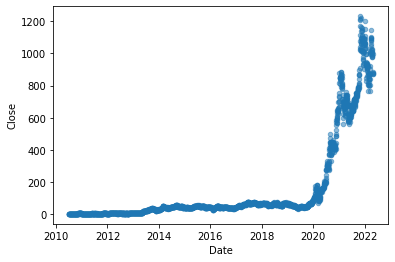

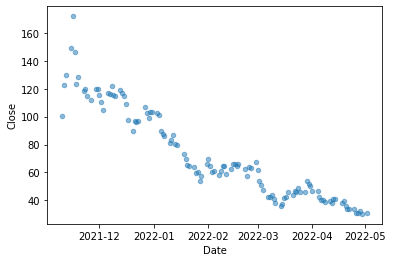

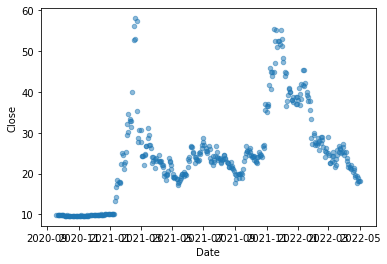

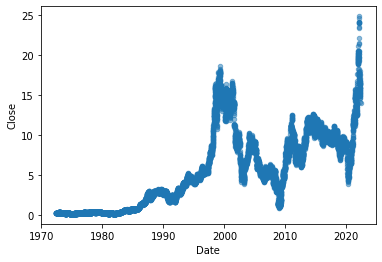

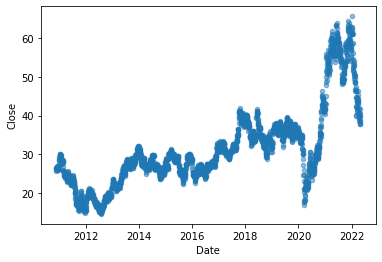

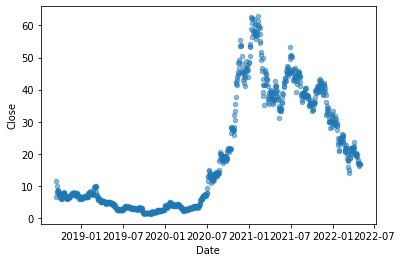

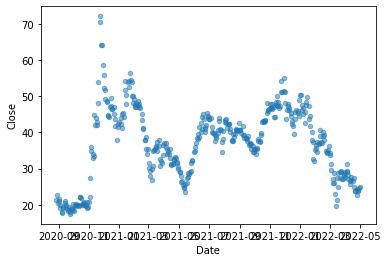

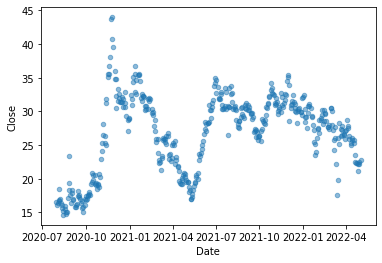

In [ ]:
## Plot Stock Graphs for each companies
tesla_data.plot.scatter(x='Date',y='Close',alpha=0.5)
rivian_data.plot.scatter(x='Date',y='Close',alpha=0.5)
lucid_data.plot.scatter(x='Date',y='Close',alpha=0.5)
ford_data.plot.scatter(x='Date',y='Close',alpha=0.5)
general_data.plot.scatter(x='Date',y='Close',alpha=0.5)
nio_data.plot.scatter(x='Date',y='Close',alpha=0.5)
xpeng_data.plot.scatter(x='Date',y='Close',alpha=0.5)
li_data.plot.scatter(x='Date',y='Close',alpha=0.5)

- Quick Analysis on Stock Scatter Plots


### Part 2: Use Webscraping to Extract Revenue
- Use the requests library to download the webpage. For example, for the revenue data set of Tesla, we got the data from webpage: https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue. Save the text of the response as a variable named html_companyname_data.
- However, from the webpage, we can see that the revenues of Rivian, Lucid, and Li (maybe Xpeng) are not worth to analyze since their annual/quarterly revenue historys and growth rates are all normally from 2020 to 2021. The revenues in such small range of time provides no meanings for forecast.
- Hence, in this part, we will mainly focus on the Revenue Data from Tesla, Ford, General Motoros, Nio, and XPeng.

In [ ]:
## Parse the html data using beautiful_soup:
#soup = BeautifulSoup(html_companyname_data,"html5lib")

#### Revenue DataFrame of Tesla

In [ ]:
# How to obtain the dataset
url_T = 'https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue'
html_data = requests.get(url_T).text
## Use the url link to the webpage and get the revenue data of Tesla and sorted them into html_tesla_data with text formate.

In [ ]:
soup = BeautifulSoup(html_data,"html5lib")

In [ ]:
# How to organze the data
tesla_revenue = pd.DataFrame(columns=['Date', 'Revenue'])

for table in soup.find_all('table'):

    if ('Tesla Quarterly Revenue' in table.find('th').text):
        rows = table.find_all('tr')
        
        for row in rows:
            col = row.find_all('td')
            
            if col != []:
                date = col[0].text
                revenue = col[1].text.replace(',','').replace('$','')

                tesla_revenue = tesla_revenue.append({"Date":date, "Revenue":revenue}, ignore_index=True)
## Using beautiful soup extract the table with Tesla Quarterly Revenue and store it into a dataframe named tesla_revenue. 
## The dataframe should have columns Date and Revenue. 
## Make sure the comma and dollar sign is removed from the Revenue column.
tesla_revenue

In [ ]:
## Re-organze the dataset that change the column type into Boolean.
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'].astype(bool)]
## If the data has NaN in the Revenue column, removing the Nan or empty strings
tesla_revenue.dropna(inplace=True)
## If the data has empty string in the Revenue column
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]
## Display the last 5 row of the revenue dataframe using the tail function.
tesla_revenue

#### Revenue DataFrame of Ford Motor

In [ ]:
## Use the requests library to download the webpage
url = 'https://www.macrotrends.net/stocks/charts/F/ford/revenue'
## Use the url link to the webpage and get the revenue data
html_data = requests.get(url).text
## Using beautiful soup extract the table and store it into a dataframe
soup = BeautifulSoup(html_data,"html5lib")
## The dataframe should have columns Date and Revenue. Make sure the comma and dollar sign is removed from the Revenue column
ford_revenue = pd.DataFrame(columns=['Date', 'Revenue'])
for table in soup.find_all('table'):

    if ('Ford Motor Quarterly Revenue' in table.find('th').text):
        rows = table.find_all('tr')
        
        for row in rows:
            col = row.find_all('td')
            
            if col != []:
                date = col[0].text
                revenue = col[1].text.replace(',','').replace('$','')

                ford_revenue = ford_revenue.append({"Date":date, "Revenue":revenue}, ignore_index=True)
# Display the dataframe to check whether there is inappropriate values.
ford_revenue

,Date,Revenue
0,2021-12-31,37678
1,2021-09-30,35683
2,2021-06-30,26752
3,2021-03-31,36228
4,2020-12-31,35952
5,2020-09-30,37501
6,2020-06-30,19371
7,2020-03-31,34320
8,2019-12-31,39715
9,2019-09-30,36990


#### Revenue DataFrame of General Motors

In [ ]:
## Use the requests library to download the webpage
url = 'https://www.macrotrends.net/stocks/charts/GM/general/revenue'
## Use the url link to the webpage and get the revenue data
html_data = requests.get(url).text
## Using beautiful soup extract the table and store it into a dataframe
soup = BeautifulSoup(html_data,"html5lib")
## The dataframe should have columns Date and Revenue. Make sure the comma and dollar sign is removed from the Revenue column
gm_revenue = pd.DataFrame(columns=['Date', 'Revenue'])
for table in soup.find_all('table'):

    if ('General Motors Quarterly Revenue' in table.find('th').text):
        rows = table.find_all('tr')
        
        for row in rows:
            col = row.find_all('td')
            
            if col != []:
                date = col[0].text
                revenue = col[1].text.replace(',','').replace('$','')

                gm_revenue = gm_revenue.append({"Date":date, "Revenue":revenue}, ignore_index=True)
# Display the dataframe to check whether there is inappropriate values.
gm_revenue

In [ ]:
## Re-organze the dataset that change the column type into Boolean.
gm_revenue = gm_revenue[gm_revenue['Revenue'].astype(bool)]
## If the data has NaN in the Revenue column, removing the Nan or empty strings
gm_revenue.dropna(inplace=True)
## If the data has empty string in the Revenue column
gm_revenue = gm_revenue[gm_revenue['Revenue'] != ""]
## Display the last 5 row of the revenue dataframe using the tail function.
gm_revenue

#### Revenue DataFrame of Nio

In [ ]:
## Use the requests library to download the webpage
url = 'https://www.macrotrends.net/stocks/charts/NIO/nio/revenue'
## Use the url link to the webpage and get the revenue data
html_data = requests.get(url).text
## Using beautiful soup extract the table and store it into a dataframe
soup = BeautifulSoup(html_data,"html5lib")
## The dataframe should have columns Date and Revenue. Make sure the comma and dollar sign is removed from the Revenue column
nio_revenue = pd.DataFrame(columns=['Date', 'Revenue'])
for table in soup.find_all('table'):

    if ('NIO Quarterly Revenue' in table.find('th').text):
        rows = table.find_all('tr')
        
        for row in rows:
            col = row.find_all('td')
            
            if col != []:
                date = col[0].text
                revenue = col[1].text.replace(',','').replace('$','')

                nio_revenue = nio_revenue.append({"Date":date, "Revenue":revenue}, ignore_index=True)
# Display the dataframe to check whether there is inappropriate values.
nio_revenue

,Date,Revenue
0,2021-09-30,1522
1,2021-06-30,1308
2,2021-03-31,1218
3,2020-12-31,1105
4,2020-09-30,667
5,2020-06-30,526
6,2020-03-31,194
7,2019-12-31,404
8,2019-09-30,257
9,2019-06-30,220


#### Revenue DataFrame of XPeng

In [ ]:
## Use the requests library to download the webpage
url = 'https://www.macrotrends.net/stocks/charts/XPEV/xpeng/revenue'
## Use the url link to the webpage and get the revenue data
html_data = requests.get(url).text
## Using beautiful soup extract the table and store it into a dataframe
soup = BeautifulSoup(html_data,"html5lib")
## The dataframe should have columns Date and Revenue. Make sure the comma and dollar sign is removed from the Revenue column
xpeng_revenue = pd.DataFrame(columns=['Date', 'Revenue'])
for table in soup.find_all('table'):

    if ('XPeng Quarterly Revenue' in table.find('th').text):
        rows = table.find_all('tr')
        
        for row in rows:
            col = row.find_all('td')
            
            if col != []:
                date = col[0].text
                revenue = col[1].text.replace(',','').replace('$','')

                xpeng_revenue = xpeng_revenue.append({"Date":date, "Revenue":revenue}, ignore_index=True)
# Display the dataframe to check whether there is inappropriate values.
xpeng_revenue

,Date,Revenue
0,2021-09-30,888
1,2021-06-30,583
2,2021-03-31,450
3,2020-12-31,437
4,2020-09-30,
5,2019-12-31,


#### Revenue DataFrame of Li Auto

In [ ]:
## Use the requests library to download the webpage
url = 'https://www.macrotrends.net/stocks/charts/LI/li/revenue'
## Use the url link to the webpage and get the revenue data
html_data = requests.get(url).text
## Using beautiful soup extract the table and store it into a dataframe
soup = BeautifulSoup(html_data,"html5lib")
## The dataframe should have columns Date and Revenue. Make sure the comma and dollar sign is removed from the Revenue column
li_revenue = pd.DataFrame(columns=['Date', 'Revenue'])
for table in soup.find_all('table'):

    if ('Li Auto Quarterly Revenue' in table.find('th').text):
        rows = table.find_all('tr')
        
        for row in rows:
            col = row.find_all('td')
            
            if col != []:
                date = col[0].text
                revenue = col[1].text.replace(',','').replace('$','')

                li_revenue = li_revenue.append({"Date":date, "Revenue":revenue}, ignore_index=True)
# Display the dataframe to check whether there is inappropriate values.
li_revenue

,Date,Revenue
0,2021-09-30,1207
1,2021-06-30,
2,2021-03-31,546
3,2020-09-30,370
4,2019-12-31,


#### Revenue DataFrame of Rivian

In [ ]:
## Use the requests library to download the webpage
url = 'https://www.macrotrends.net/stocks/charts/RIVN/Rivian/revenue'
## Use the url link to the webpage and get the revenue data
html_data = requests.get(url).text
## Using beautiful soup extract the table and store it into a dataframe
soup = BeautifulSoup(html_data,"html5lib")
## The dataframe should have columns Date and Revenue. Make sure the comma and dollar sign is removed from the Revenue column
rivian_revenue = pd.DataFrame(columns=['Date', 'Revenue'])
for table in soup.find_all('table'):

    if ('Rivian Automotive Quarterly Revenue' in table.find('th').text):
        rows = table.find_all('tr')
        
        for row in rows:
            col = row.find_all('td')
            
            if col != []:
                date = col[0].text
                revenue = col[1].text.replace(',','').replace('$','')

                rivian_revenue = rivian_revenue.append({"Date":date, "Revenue":revenue}, ignore_index=True)
# Display the dataframe to check whether there is inappropriate values.
rivian_revenue

,Date,Revenue
0,2021-12-31,
1,2021-09-30,1
2,2020-12-31,
3,2020-09-30,
4,2019-12-31,


#### Revenue DataFrame of Lucid

In [ ]:
## Use the requests library to download the webpage
url = 'https://www.macrotrends.net/stocks/charts/LCID/Lucid/revenue'
## Use the url link to the webpage and get the revenue data
html_data = requests.get(url).text
## Using beautiful soup extract the table and store it into a dataframe
soup = BeautifulSoup(html_data,"html5lib")
## The dataframe should have columns Date and Revenue. Make sure the comma and dollar sign is removed from the Revenue column
lucid_revenue = pd.DataFrame(columns=['Date', 'Revenue'])
for table in soup.find_all('table'):
    
    if ('Lucid Quarterly Revenue' in table.find('th').text):
        rows = table.find_all('tr')
        
        for row in rows:
            col = row.find_all('td')
            
            if col != []:
                date = col[0].text
                revenue = col[1].text.replace(',','').replace('$','')
                
                lucid_revenue = lucid_revenue.append({"Date":date, "Revenue":revenue}, ignore_index=True)
# Display the dataframe to check whether there is inappropriate values.
lucid_revenue

,Date,Revenue
0,2021-12-31,27
1,2021-09-30,0
2,2021-06-30,
3,2021-03-31,
4,2020-12-31,
5,2020-09-30,0
6,2020-06-30,
7,2019-12-31,


- It is clear that the revenues of last four companies are too few to represent anything. Too small range of predictors can cause occasional large error than the more frequent small error. Small sample size also affects the reliability of a survey's results because it leads to a higher variability, which may lead to bias. The smaller your sample size, the more likely outliers. The results computed by too small sample sizes are also not valuable to analyze this market as well. Hence, we will not furthur compare the revenues from last 4 companies with the revenue of Tesla. 
- Removing the last four companies does not mean that we assume they are not possible to fight with Tesla in the future. We are stopped by its small size of data, so the expeirment may be improved furthur by adding enough samples or possible companies.

In [ ]:
### Stock & Revenue Graphs
#### Here we combine both the stock graphs and revenue graphs that we believe is still considered as the competitors for Tesla.
#### Main force in the electrical vehicle company we original believed:
make_graph(tesla_data[['Date','Close']], tesla_revenue, 'Tesla')
#### Possible Competitors:
make_graph(ford_data[['Date','Close']], ford_revenue, 'Ford')
make_graph(general_data[['Date','Close']], gm_revenue, 'General Motors')
make_graph(nio_data[['Date','Close']], nio_revenue, 'Nio')

- Quick Analaysis on the graphs above:
    - From seeing the merged graphs of Stock Close Prices and Revenues, we can see that Tesla's general stock price is increasing over time at a nice deal of rate. However, its historical revenue shows a shocking downward for twice. Compared to Tesla, Ford has a unstable changing on its stock price, but most recently, the trend is in an increasing shape. And its historical revenue is in a relative high range of amount. General Motors has a smoother increasing rate of change of its stock price. Its highest value is happened at Jan 2022 of 75.64 dollars. It's higher than the Ford but still has a big difference with Tesla. Similarly with its stock price, the historical revenue of General Motors is also smoothly changing expect only two shocks. Nio has similar highest value of stock price with General Motors, but the pricing is decreasing recently. However, oppositly, the historical revenue of this company is climbing upwards in a decent increasing rate. 

## Ratio Analysis
#### By obatining and plotting data sets above, we believe that Ford, General Motors, and Nio are three most possible competitors to Tesla on the market of electrical vehicles. All these data above contains name, sector, industry, market cap of each company as the basic information; and revenue, gross profit, stock price of each company as the Earnings & Growth analysis.
#### In order to deeply compare these companies, we decide to apply Ratio Analysis, since Ratio Analysis helps investors compare companies' financial performance. 
- Ratio analysis can provide insight into companies' relative financial health and future prospects.
- It can yield data about profitability, liquidity, earnings, extended viability, and more. 
- The results of such comparisons can mean more powerful decision-making when it comes to selecting companies in which to invest.

#### Ratio Analysis consists many ratios, but for ratios like price-to-earnings ratio and the net profit margin, are used more frequently by investors and analysts. It's useful to compare various ratios of different companies over time for a reliable view of current and potential future financial performance.
- In this report, we will apply:
    - Profitability ratios (e.g., net profit margin and return on shareholders' equity)
    - Liquidity ratios (e.g., working capital)
    - Debt or leverage ratios (e.g., debt-to-equity and debt-to-asset ratios)
    - Operations ratios (e.g., inventory turnover)
    - Market ratios (e.g. earnings per share (EPS))
- Some key ratios that investors use are the net profit margin and price-to-earnings (P/E) ratios.

In [ ]:
### For this part, we need more datasets to measure ratios more accuracy. 
## Tesla
tsla_IS = pd.read_csv("TSLA_annual_financials.csv")
tsla_BS = pd.read_csv("TSLA_annual_balance-sheet.csv")
tsla_CF = pd.read_csv("TSLA_annual_cash-flow.csv")

In [ ]:
## Editing the details of the datatype
### Switching the columns with the rows
tsla_IS = tsla_IS.T
### Replace the header with the first row
tsla_IS.columns = tsla_IS.iloc[0]
### Delete the first row
tsla_IS = tsla_IS.iloc[1:]
### Defined dataframe
tsla_IS

name,TotalRevenue,\tOperatingRevenue,CostOfRevenue,GrossProfit,OperatingExpense,\tSellingGeneralAndAdministration,\tResearchAndDevelopment,OperatingIncome,NetNonOperatingInterestIncomeExpense,\tInterestIncomeNonOperating,...,EBIT,EBITDA,ReconciledCostOfRevenue,ReconciledDepreciation,NetIncomeFromContinuingOperationNetMinorityInterest,TotalUnusualItemsExcludingGoodwill,TotalUnusualItems,NormalizedEBITDA,TaxRateForCalcs,TaxEffectOfUnusualItems
ttm,"62,190,000,000","62,190,000,000","45,339,000,000","16,851,000,000","7,245,000,000","4,453,000,000","2,792,000,000","9,606,000,000","-259,000,000","74,000,000",...,"9,769,000,000","12,939,000,000","45,339,000,000","3,170,000,000","8,399,000,000","-74,000,000","-74,000,000","13,013,000,000",0.103,"-7,654,090.716"
12/31/2021,"53,823,000,000","53,823,000,000","40,217,000,000","13,606,000,000","7,110,000,000","4,517,000,000","2,593,000,000","6,496,000,000","-315,000,000","56,000,000",...,"6,714,000,000",NaN,"40,217,000,000","2,911,000,000","5,519,000,000","27,000,000","27,000,000","9,598,000,000",0.11,"2,970,000"
12/31/2020,"31,536,000,000","31,536,000,000","24,906,000,000","6,630,000,000","4,636,000,000","3,145,000,000","1,491,000,000","1,994,000,000","-718,000,000","30,000,000",...,"1,902,000,000",NaN,"24,906,000,000","2,322,000,000","690,000,000",0,0,"4,224,000,000",0.25,0
12/31/2019,"24,578,000,000","24,578,000,000","20,509,000,000","4,069,000,000","3,989,000,000","2,646,000,000","1,343,000,000","80,000,000","-641,000,000","44,000,000",...,"20,000,000",NaN,"20,509,000,000","2,154,000,000","-862,000,000","-149,000,000","-149,000,000","2,323,000,000",0.17,"-25,330,000"
12/31/2018,"21,461,268,000","21,461,268,000","17,419,247,000","4,042,021,000","4,294,861,000","2,834,491,000","1,460,370,000","-252,840,000","-638,538,000","24,533,000",...,"-341,674,000",NaN,"17,419,247,000","1,901,050,000","-976,091,000","-135,233,000","-135,233,000","1,694,609,000",0.27,"-36,512,910"
12/31/2017,"11,758,751,000","11,758,751,000","9,536,264,000","2,222,487,000","3,854,573,000","2,476,500,000","1,378,073,000","-1,632,086,000","-451,573,000","19,686,000",...,"-1,737,773,000",NaN,"9,536,264,000","1,636,003,000","-1,961,400,000",NaN,NaN,"-101,770,000",0.4,0
12/31/2016,"7,000,132,000","7,000,132,000","5,400,875,000","1,599,257,000","2,266,597,000","1,432,189,000","834,408,000","-667,340,000","-190,280,000","8,530,000",...,"-547,538,000",NaN,"5,400,875,000","947,099,000","-674,914,000",NaN,NaN,"399,561,000",0.4,0
12/31/2015,"4,046,025,000","4,046,025,000","3,122,522,000","923,503,000","1,640,132,000","922,232,000","717,900,000","-716,629,000","-117,343,000","1,508,000",...,"-756,773,000",NaN,"3,122,522,000","422,590,000","-888,663,000",NaN,NaN,"-334,183,000",0.4,0
12/31/2014,"3,198,356,000","3,198,356,000","2,316,685,000","881,671,000","1,068,360,000","603,660,000","464,700,000","-186,689,000","-99,760,000","1,126,000",...,"-183,750,000",NaN,"2,316,685,000","231,931,000","-294,040,000",NaN,NaN,"48,181,000",0.35,0
12/31/2013,"2,013,496,000","2,013,496,000","1,557,234,000","456,262,000","517,545,000","285,569,000","231,976,000","-61,283,000","-32,745,000","189,000",...,"-38,492,000",NaN,"1,557,234,000","106,083,000","-74,014,000",NaN,NaN,"67,591,000",0.35,0


In [ ]:
## Editing the details of the datatype
### Switching the columns with the rows
tsla_BS = tsla_BS.T
### Replace the header with the first row
tsla_BS.columns = tsla_BS.iloc[0]
### Delete the first row
tsla_BS = tsla_BS.iloc[1:]
### Defined dataframe
tsla_BS

name,TotalAssets,\tCurrentAssets,\t\tCashCashEquivalentsAndShortTermInvestments,\t\t\tCashAndCashEquivalents,\t\t\tOtherShortTermInvestments,\t\tReceivables,\t\t\tAccountsReceivable,\t\tInventory,\t\t\tRawMaterials,\t\t\tWorkInProcess,...,CommonStockEquity,CapitalLeaseObligations,NetTangibleAssets,WorkingCapital,InvestedCapital,TangibleBookValue,TotalDebt,NetDebt,ShareIssued,OrdinarySharesNumber
12/31/2021,"62,131,000,000","27,100,000,000","17,707,000,000","17,576,000,000","131,000,000","1,913,000,000","1,913,000,000","5,757,000,000","2,816,000,000","1,089,000,000",...,"30,189,000,000","3,531,000,000","28,472,000,000","7,395,000,000","35,531,000,000","28,472,000,000","8,873,000,000",NaN,"1,033,000,000","1,033,000,000"
12/31/2020,"52,148,000,000","26,717,000,000","19,384,000,000","19,384,000,000",NaN,"1,886,000,000","1,886,000,000","4,101,000,000","1,508,000,000","493,000,000",...,"22,225,000,000","3,008,000,000","21,705,000,000","12,469,000,000","32,496,000,000","21,705,000,000","13,279,000,000",NaN,"960,000,000","960,000,000"
12/31/2019,"34,309,000,000","12,103,000,000","6,268,000,000","6,268,000,000",NaN,"1,324,000,000","1,324,000,000","3,552,000,000","1,428,000,000","362,000,000",...,"6,618,000,000","2,896,000,000","6,081,000,000","1,436,000,000","18,419,000,000","6,081,000,000","14,697,000,000","5,533,000,000","905,310,430","905,310,430"
12/31/2018,"29,739,614,000","8,306,308,000","3,685,618,000","3,685,618,000",NaN,"949,022,000","949,022,000","3,113,446,000","931,828,000","296,991,000",...,"4,923,243,000","3,194,796,000","4,572,592,000","-1,685,828,000","15,555,718,000","4,572,592,000","13,827,271,000","6,946,857,000","863,013,140","863,013,140"
12/31/2017,"28,655,372,000","6,570,520,000","3,367,914,000","3,367,914,000",NaN,"515,381,000","515,381,000","2,263,537,000","821,396,000","243,181,000",...,"4,237,242,000","1,801,010,000","3,815,503,000","-1,104,150,000","14,552,180,000","3,815,503,000","12,115,948,000","6,947,024,000","843,985,000","843,985,000"
12/31/2016,"22,664,076,000","6,259,796,000","3,393,216,000","3,393,216,000",NaN,"499,142,000","499,142,000","2,067,454,000","680,339,000","233,746,000",...,"4,752,911,000","1,459,684,000","4,376,766,000","432,791,000","11,881,342,000","4,376,766,000","8,588,115,000","3,735,215,000","807,805,000","807,805,000"
12/31/2015,"8,092,460,000","2,791,568,000","1,196,908,000","1,196,908,000",NaN,"168,965,000","168,965,000","1,277,838,000","528,935,000","163,830,000",...,"1,088,944,000","32,671,000","1,088,944,000","-24,706,000","3,804,530,000","1,088,944,000","2,715,586,000","1,518,678,000","657,125,000","657,125,000"
12/31/2014,"5,849,251,000","3,198,657,000","1,905,713,000","1,905,713,000",NaN,"226,604,000","226,604,000","953,675,000","392,292,000","56,114,000",...,"911,710,000","42,829,000","911,710,000","1,091,491,000","3,377,990,000","911,710,000","2,509,109,000","560,567,000","628,438,035","628,438,035"
12/31/2013,"2,416,930,000","1,265,939,000","845,889,000","845,889,000",NaN,"49,109,000","49,109,000","340,355,000","184,665,000","42,500,000",...,"667,120,000","20,577,000","653,190,000","590,779,000","1,253,421,000","653,190,000","606,878,000",NaN,"615,454,950","615,454,950"
12/31/2012,"1,114,190,000","524,768,000","201,890,000","201,890,000",0,"26,842,000","26,842,000","268,504,000","163,637,000","24,535,000",...,"124,700,000","14,330,000","110,433,000","-14,340,000","577,036,000","110,433,000","466,666,000","250,446,000","571,071,370","571,071,370"


In [ ]:
## Editing the details of the datatype
### Switching the columns with the rows
tsla_CF = tsla_CF.T
### Replace the header with the first row
tsla_CF.columns = tsla_CF.iloc[0]
### Delete the first row
tsla_CF = tsla_CF.iloc[1:]
### Defined dataframe
tsla_CF

name,OperatingCashFlow,\tCashFlowFromContinuingOperatingActivities,\t\tNetIncomeFromContinuingOperations,\t\tOperatingGainsLosses,\t\t\tGainLossOnSaleOfPPE,\t\t\tNetForeignCurrencyExchangeGainLoss,\t\t\tGainLossOnInvestmentSecurities,\t\tDepreciationAmortizationDepletion,\t\t\tDepreciationAndAmortization,\t\t\t\tDepreciation,...,\tChangesInCash,\tEffectOfExchangeRateChanges,\tBeginningCashPosition,IncomeTaxPaidSupplementalData,InterestPaidSupplementalData,CapitalExpenditure,IssuanceOfCapitalStock,IssuanceOfDebt,RepaymentOfDebt,FreeCashFlow
ttm,"13,851,000,000","13,851,000,000","8,460,000,000","-9,000,000","74,000,000","-83,000,000",NaN,"3,170,000,000","3,170,000,000",NaN,...,"297,000,000","20,000,000","17,723,000,000",NaN,NaN,"-6,935,000,000",NaN,"5,900,000,000","-12,538,000,000","6,916,000,000"
12/31/2021,"11,497,000,000","11,497,000,000","5,644,000,000","-82,000,000","-27,000,000","-55,000,000",NaN,"2,911,000,000","2,911,000,000","2,911,000,000",...,"-1,574,000,000","-183,000,000","19,901,000,000","561,000,000","266,000,000","-8,014,000,000",0,"8,883,000,000","-14,615,000,000","3,483,000,000"
12/31/2020,"5,943,000,000","5,943,000,000","862,000,000","231,000,000","117,000,000","114,000,000",NaN,"2,322,000,000","2,322,000,000",NaN,...,"12,784,000,000","334,000,000","6,783,000,000","115,000,000","444,000,000","-3,242,000,000","12,269,000,000","9,713,000,000","-12,201,000,000","2,701,000,000"
12/31/2019,"2,405,000,000","2,405,000,000","-775,000,000","98,000,000","146,000,000","-48,000,000",NaN,"2,154,000,000","2,154,000,000",NaN,...,"2,498,000,000","8,000,000","4,277,000,000","54,000,000","455,000,000","-1,437,000,000","848,000,000","10,669,000,000","-9,871,000,000","968,000,000"
12/31/2018,"2,097,802,000","2,097,802,000","-1,062,582,000","159,850,000","161,361,000","-1,511,000",NaN,"1,901,050,000","1,901,050,000",NaN,...,"334,129,000","-22,700,000","3,964,959,000","35,409,000","380,836,000","-2,319,516,000",0,"6,176,173,000","-6,087,029,000","-221,714,000"
12/31/2017,"-60,654,000","-60,654,000","-2,240,578,000","158,079,000","105,770,000","52,309,000",NaN,"1,636,003,000","1,636,003,000",NaN,...,"-64,757,000","39,455,000","3,393,216,000","65,695,000","182,571,000","-4,081,354,000","400,175,000","7,649,376,000","-4,263,788,000","-4,142,008,000"
12/31/2016,"-123,829,000","-123,829,000","-773,046,000","5,450,000","34,633,000","-29,183,000",NaN,"947,099,000","947,099,000",NaN,...,"2,203,717,000","-7,409,000","1,196,908,000","16,385,000","38,693,000","-1,440,471,000","1,701,734,000","3,622,673,000","-1,904,483,000","-1,564,300,000"
12/31/2015,"-524,499,000","-524,499,000","-888,663,000","93,488,000","37,723,000","55,765,000",NaN,"422,590,000","422,590,000",NaN,...,"-674,527,000","-34,278,000","1,905,713,000","9,461,000","32,060,000","-1,634,850,000","750,000,000","887,717,000","-203,780,000","-2,159,349,000"
12/31/2014,"-57,337,000","-57,337,000","-294,040,000","12,287,000","14,178,000","-1,891,000",NaN,"231,931,000","231,931,000",NaN,...,"1,095,349,000","-35,525,000","845,889,000","3,120,000","20,539,000","-969,885,000",0,"2,303,271,000","-11,179,000","-1,027,222,000"
12/31/2013,"257,994,000","257,994,000","-74,014,000","-7,037,000",NaN,"3,655,000","-10,692,000","106,083,000","106,083,000",NaN,...,"643,999,000",NaN,"201,890,000","257,000","9,041,000","-264,224,000","415,000,000","660,000,000","-460,762,000","-6,230,000"


In [ ]:
### For this part, we need more datasets to measure ratios more accuracy. 
## Ford
f_IS = pd.read_csv("F_annual_financials.csv")
f_BS = pd.read_csv("F_annual_balance-sheet.csv")
f_CF = pd.read_csv("F_annual_cash-flow.csv")

In [ ]:
## Editing the details of the datatype
### Switching the columns with the rows
f_IS = f_IS.T
### Replace the header with the first row
f_IS.columns = f_IS.iloc[0]
### Delete the first row
f_IS = f_IS.iloc[1:]
### Defined dataframe
f_IS

name,TotalRevenue,\tOperatingRevenue,CostOfRevenue,GrossProfit,OperatingExpense,\tSellingGeneralAndAdministration,\t\tGeneralAndAdministrativeExpense,\t\t\tOtherGandA,\tDepreciationAmortizationDepletionIncomeStatement,\t\tDepreciationAndAmortizationInIncomeStatement,...,EBIT,EBITDA,ReconciledCostOfRevenue,ReconciledDepreciation,NetIncomeFromContinuingOperationNetMinorityInterest,TotalUnusualItemsExcludingGoodwill,TotalUnusualItems,NormalizedEBITDA,TaxRateForCalcs,TaxEffectOfUnusualItems
ttm,"136,341,000,000","136,341,000,000","114,651,000,000","21,690,000,000","11,915,000,000","11,915,000,000",NaN,NaN,NaN,NaN,...,"24,835,000,000","30,795,000,000","114,651,000,000","5,960,000,000","17,937,000,000","7,457,000,000","7,457,000,000","23,338,000,000",0.27,"2,013,390,000"
12/31/2021,"136,341,000,000","136,341,000,000","114,651,000,000","21,690,000,000","11,915,000,000","11,915,000,000",NaN,NaN,NaN,NaN,...,"24,835,000,000",NaN,"114,651,000,000","5,960,000,000","17,937,000,000","7,457,000,000","7,457,000,000","23,338,000,000",0.27,"2,013,390,000"
12/31/2020,"127,144,000,000","127,144,000,000","112,752,000,000","14,392,000,000","10,193,000,000","10,193,000,000",NaN,NaN,NaN,NaN,...,"9,140,000,000",NaN,"112,752,000,000","7,457,000,000","-1,279,000,000","324,000,000","324,000,000","16,273,000,000",0.27,"87,480,000"
12/31/2019,"155,900,000,000","155,900,000,000","134,693,000,000","21,207,000,000","11,161,000,000","11,161,000,000",NaN,NaN,NaN,NaN,...,"9,881,000,000",NaN,"134,693,000,000","8,490,000,000","47,000,000","89,000,000","89,000,000","18,282,000,000",0.27,"24,030,000"
12/31/2018,"160,338,000,000","160,338,000,000","136,269,000,000","24,069,000,000","11,403,000,000","11,403,000,000",NaN,NaN,NaN,NaN,...,"15,036,000,000",NaN,"136,269,000,000","8,308,000,000","3,677,000,000","115,000,000","115,000,000","23,229,000,000",0.15,"17,250,000"
12/31/2017,"156,776,000,000","156,766,000,000","131,332,000,000","25,444,000,000","11,527,000,000","11,527,000,000","11,527,000,000","11,527,000,000",NaN,NaN,...,"18,385,000,000",NaN,"131,332,000,000","8,453,000,000","7,602,000,000","-22,000,000","-22,000,000","26,860,000,000",0.064,"-1,408,000"
12/31/2016,"151,800,000,000","151,799,000,000","126,584,000,000","25,216,000,000","12,196,000,000","12,196,000,000",NaN,NaN,NaN,NaN,...,"16,594,000,000",NaN,"126,584,000,000","8,717,000,000","4,596,000,000","147,000,000","147,000,000","25,164,000,000",0.322,"47,334,000"
12/31/2015,"149,558,000,000","149,558,000,000","126,495,000,000","23,063,000,000","15,416,000,000","14,999,000,000",NaN,NaN,NaN,NaN,...,"11,025,000,000",NaN,"126,495,000,000","7,966,000,000","7,373,000,000","180,000,000","180,000,000","18,811,000,000",0.281,"50,580,000"
12/31/2014,"144,077,000,000","144,077,000,000","126,215,000,000","17,862,000,000","14,422,000,000","14,117,000,000",NaN,NaN,NaN,NaN,...,"5,139,000,000",NaN,"126,215,000,000","7,423,000,000","3,187,000,000","-16,000,000","-16,000,000","12,578,000,000",0.266,"-4,259,788.116"
12/31/2013,"146,917,000,000","146,917,000,000","128,094,000,000","18,823,000,000","13,384,000,000","13,176,000,000",NaN,NaN,NaN,NaN,...,"7,830,000,000",NaN,"128,094,000,000","6,456,000,000","7,155,000,000","290,000,000","290,000,000","13,996,000,000",0.35,"101,500,000"


In [ ]:
## Editing the details of the datatype
### Switching the columns with the rows
f_BS = f_BS.T
### Replace the header with the first row
f_BS.columns = f_BS.iloc[0]
### Delete the first row
f_BS = f_BS.iloc[1:]
### Defined dataframe
f_BS

name,TotalAssets,\tCurrentAssets,\t\tCashCashEquivalentsAndShortTermInvestments,\t\t\tCashAndCashEquivalents,\t\t\t\tCashFinancial,\t\t\t\tCashEquivalents,\t\t\tOtherShortTermInvestments,\t\tReceivables,\t\t\tAccountsReceivable,\t\t\t\tGrossAccountsReceivable,...,CapitalLeaseObligations,NetTangibleAssets,WorkingCapital,InvestedCapital,TangibleBookValue,TotalDebt,NetDebt,ShareIssued,OrdinarySharesNumber,TreasurySharesNumber
12/31/2021,"257,035,000,000","108,996,000,000","49,593,000,000","20,540,000,000","15,105,000,000","5,435,000,000","29,053,000,000","43,913,000,000","43,913,000,000","44,243,000,000",...,"1,393,000,000","48,519,000,000","18,269,000,000","186,611,000,000","48,519,000,000","139,485,000,000","117,552,000,000","4,121,000,000","4,121,000,000",NaN
12/31/2020,"267,261,000,000","116,744,000,000","49,961,000,000","25,243,000,000","14,666,000,000","10,577,000,000","24,718,000,000","52,394,000,000","52,394,000,000","52,478,000,000",...,"1,314,000,000","30,690,000,000","19,552,000,000","192,374,000,000","30,690,000,000","162,998,000,000","136,441,000,000","4,096,000,000","4,096,000,000",NaN
12/31/2019,"258,537,000,000","114,047,000,000","34,651,000,000","17,504,000,000","14,662,000,000","2,842,000,000","17,147,000,000","62,888,000,000","62,888,000,000","62,951,000,000",...,"1,414,000,000","32,719,000,000","15,915,000,000","188,492,000,000","32,719,000,000","156,721,000,000","137,803,000,000","3,964,929,075","3,964,929,075",NaN
12/31/2018,"256,540,000,000","114,649,000,000","33,951,000,000","16,718,000,000","14,497,000,000","2,221,000,000","17,233,000,000","65,548,000,000","65,548,000,000","65,642,000,000",...,NaN,"35,490,000,000","19,080,000,000","190,145,000,000","35,490,000,000","154,213,000,000","137,495,000,000","4,071,000,000","4,071,000,000",NaN
12/31/2017,"257,808,000,000","115,902,000,000","38,927,000,000","18,492,000,000","16,063,000,000","2,429,000,000","20,435,000,000","62,809,000,000","62,809,000,000","62,809,000,000",...,NaN,"34,890,000,000","21,302,000,000","189,177,000,000","34,890,000,000","154,287,000,000","135,795,000,000","4,174,000,000","4,058,000,000","116,000,000"
12/31/2016,"237,951,000,000","108,461,000,000","38,827,000,000","15,905,000,000","13,651,000,000","2,254,000,000","22,922,000,000","57,368,000,000","57,368,000,000","57,760,000,000",...,NaN,"29,170,000,000","18,180,000,000","172,140,000,000","29,170,000,000","142,970,000,000","127,065,000,000","4,163,000,000","4,047,000,000","116,000,000"
12/31/2015,"224,925,000,000","145,470,000,000","35,176,000,000","14,272,000,000",NaN,NaN,"20,904,000,000","101,975,000,000","90,691,000,000","90,691,000,000",...,NaN,"28,642,000,000","64,208,000,000","161,496,000,000","28,642,000,000","132,854,000,000","118,582,000,000","4,031,000,000","4,031,000,000",NaN
12/31/2014,"208,527,000,000","131,835,000,000","31,150,000,000","10,757,000,000",NaN,NaN,"20,393,000,000","92,819,000,000","81,111,000,000","81,111,000,000",...,NaN,"24,805,000,000","54,694,000,000","143,976,000,000","24,805,000,000","119,171,000,000","108,414,000,000","4,009,000,000","4,009,000,000",NaN
12/31/2013,"202,026,000,000","131,585,000,000","36,568,000,000","14,468,000,000",NaN,NaN,"22,100,000,000","87,309,000,000","77,481,000,000","77,481,000,000",...,NaN,"26,383,000,000","57,454,000,000","141,071,000,000","26,383,000,000","114,688,000,000","100,220,000,000","3,984,000,000","3,984,000,000",NaN
12/31/2012,"190,554,000,000","125,643,000,000","35,943,000,000","15,659,000,000",NaN,NaN,"20,284,000,000","82,338,000,000","71,510,000,000","71,510,000,000",...,NaN,"15,860,000,000","52,215,000,000","121,005,000,000","15,860,000,000","105,058,000,000","89,399,000,000","3,946,000,000","3,946,000,000",NaN


In [ ]:
## Editing the details of the datatype
### Switching the columns with the rows
f_CF = f_CF.T
### Replace the header with the first row
f_CF.columns = f_CF.iloc[0]
### Delete the first row
f_CF = f_CF.iloc[1:]
### Defined dataframe
f_CF

name,OperatingCashFlow,\tCashFlowFromContinuingOperatingActivities,\t\tNetIncomeFromContinuingOperations,\t\tOperatingGainsLosses,\t\t\tGainLossOnSaleOfBusiness,\t\t\tNetForeignCurrencyExchangeGainLoss,\t\t\tGainLossOnInvestmentSecurities,\t\t\tEarningsLossesFromEquityInvestments,\t\t\tPensionAndEmployeeBenefitExpense,\t\tDepreciationAmortizationDepletion,...,\tBeginningCashPosition,\tOtherCashAdjustmentOutsideChangeinCash,IncomeTaxPaidSupplementalData,InterestPaidSupplementalData,CapitalExpenditure,IssuanceOfCapitalStock,IssuanceOfDebt,RepaymentOfDebt,RepurchaseOfCapitalStock,FreeCashFlow
ttm,"15,787,000,000","15,787,000,000","17,910,000,000","-12,158,000,000",NaN,"532,000,000","-9,159,000,000","-368,000,000","-4,865,000,000","5,960,000,000",...,"25,935,000,000",NaN,NaN,NaN,"-6,227,000,000",NaN,"27,901,000,000","-54,164,000,000",0,"9,560,000,000"
12/31/2021,"15,787,000,000","15,787,000,000","17,910,000,000","-12,158,000,000",NaN,"532,000,000","-9,159,000,000","-368,000,000","-4,865,000,000","5,960,000,000",...,"25,935,000,000",NaN,NaN,NaN,"-6,227,000,000",NaN,"27,901,000,000","-54,164,000,000",0,"9,560,000,000"
12/31/2020,"24,269,000,000","24,269,000,000","-1,276,000,000","-2,839,000,000",NaN,"-420,000,000",NaN,"-3,446,000,000","1,027,000,000","7,457,000,000",...,"17,741,000,000",NaN,NaN,NaN,"-5,742,000,000",NaN,"65,900,000,000","-60,514,000,000",0,"18,527,000,000"
12/31/2019,"17,639,000,000","17,639,000,000","84,000,000","2,745,000,000",NaN,"-54,000,000",NaN,"174,000,000","2,625,000,000","8,490,000,000",...,"16,907,000,000",NaN,NaN,NaN,"-7,632,000,000",NaN,"47,604,000,000","-46,497,000,000","-237,000,000","10,007,000,000"
12/31/2018,"15,022,000,000","15,022,000,000","3,695,000,000","1,093,000,000","-42,000,000","529,000,000",NaN,"164,000,000","400,000,000","8,308,000,000",...,"18,638,000,000",NaN,NaN,NaN,"-7,785,000,000",NaN,"50,130,000,000","-44,172,000,000","-164,000,000","7,237,000,000"
12/31/2017,"18,096,000,000","18,096,000,000","7,628,000,000","-778,000,000","-7,000,000","-403,000,000",NaN,"233,000,000","-608,000,000","8,453,000,000",...,"15,905,000,000",NaN,NaN,NaN,"-7,049,000,000",NaN,"47,030,000,000","-40,770,000,000","-131,000,000","11,047,000,000"
12/31/2016,"19,792,000,000","19,792,000,000","4,607,000,000","2,633,000,000",NaN,"283,000,000",NaN,"-317,000,000","2,667,000,000","8,717,000,000",...,"14,272,000,000",NaN,NaN,NaN,"-6,992,000,000",NaN,"49,825,000,000","-38,797,000,000","-145,000,000","12,800,000,000"
12/31/2015,"16,170,000,000","16,170,000,000","7,371,000,000","846,000,000",NaN,"710,000,000",NaN,"-375,000,000","511,000,000","7,966,000,000",...,"10,757,000,000",NaN,NaN,NaN,"-7,196,000,000",NaN,"50,506,000,000","-33,358,000,000","-129,000,000","8,974,000,000"
12/31/2014,"14,507,000,000","14,507,000,000","3,186,000,000","3,061,000,000",NaN,"825,000,000",NaN,"987,000,000","1,249,000,000","7,423,000,000",...,"14,468,000,000",NaN,NaN,NaN,"-7,463,000,000",NaN,"40,043,000,000","-32,729,000,000","-1,964,000,000","7,044,000,000"
12/31/2013,"10,444,000,000","10,444,000,000","7,155,000,000","-359,000,000",0,"228,000,000","-190,000,000","-416,000,000",NaN,"6,456,000,000",...,"15,659,000,000",NaN,"538,000,000","3,501,000,000","-6,597,000,000",NaN,"40,543,000,000","-30,880,000,000","-213,000,000","3,847,000,000"


In [ ]:
### For this part, we need more datasets to measure ratios more accuracy. 
## General Motors
gm_IS = pd.read_csv("GM_annual_financials.csv")
gm_BS = pd.read_csv("GM_annual_balance-sheet.csv")
gm_CF = pd.read_csv("GM_annual_cash-flow.csv")

In [ ]:
## Editing the details of the datatype
### Switching the columns with the rows
gm_IS = gm_IS.T
### Replace the header with the first row
gm_IS.columns = gm_IS.iloc[0]
### Delete the first row
gm_IS = gm_IS.iloc[1:]
### Defined dataframe
gm_IS

name,TotalRevenue,\tOperatingRevenue,CostOfRevenue,GrossProfit,OperatingExpense,\tSellingGeneralAndAdministration,\t\tGeneralAndAdministrativeExpense,\t\t\tSalariesAndWages,\t\t\tOtherGandA,\tDepreciationAmortizationDepletionIncomeStatement,...,EBIT,EBITDA,ReconciledCostOfRevenue,ReconciledDepreciation,NetIncomeFromContinuingOperationNetMinorityInterest,TotalUnusualItemsExcludingGoodwill,TotalUnusualItems,NormalizedEBITDA,TaxRateForCalcs,TaxEffectOfUnusualItems
ttm,"130,509,000,000","130,509,000,000","113,011,000,000","17,498,000,000","9,255,000,000",NaN,NaN,NaN,NaN,NaN,...,"12,230,000,000","24,157,000,000","113,011,000,000","11,927,000,000","9,936,000,000","571,000,000","571,000,000","23,586,000,000",0.139,"79,103,503.185"
12/31/2021,"127,004,000,000","127,004,000,000","109,126,000,000","17,878,000,000","8,554,000,000","8,554,000,000",NaN,NaN,NaN,NaN,...,"13,666,000,000",NaN,"109,126,000,000","12,051,000,000","10,019,000,000","571,000,000","571,000,000","25,146,000,000",0.218,"124,478,000"
12/31/2020,"122,485,000,000","122,485,000,000","108,813,000,000","13,672,000,000","7,038,000,000","7,038,000,000",NaN,NaN,NaN,NaN,...,"9,193,000,000",NaN,"108,813,000,000","12,815,000,000","6,427,000,000","265,000,000","265,000,000","21,743,000,000",0.219,"58,035,000"
12/31/2019,"137,237,000,000","137,237,000,000","123,265,000,000","13,972,000,000","8,491,000,000","8,491,000,000",NaN,NaN,NaN,NaN,...,"8,218,000,000",NaN,"123,265,000,000","14,118,000,000","6,732,000,000","80,000,000","80,000,000","22,256,000,000",0.103,"8,240,000"
12/31/2018,"147,049,000,000","147,049,000,000","132,954,000,000","14,095,000,000","9,650,000,000","9,650,000,000",NaN,NaN,NaN,NaN,...,"9,204,000,000",NaN,"132,954,000,000","13,669,000,000","8,084,000,000","258,000,000","258,000,000","22,615,000,000",0.055,"14,190,000"
12/31/2017,"145,588,000,000","145,588,000,000","125,997,000,000","19,591,000,000","9,575,000,000","9,575,000,000",NaN,NaN,NaN,NaN,...,"12,438,000,000",NaN,"125,997,000,000","12,261,000,000","348,000,000",0,0,"24,699,000,000",0.4,0
12/31/2016,"166,380,000,000","166,380,000,000","145,125,000,000","21,255,000,000","11,710,000,000","11,710,000,000",NaN,NaN,NaN,NaN,...,"12,256,000,000",NaN,"145,125,000,000","10,408,000,000","9,427,000,000","3,000,000","3,000,000","22,661,000,000",0.207,"620,335.502"
12/31/2015,"152,356,000,000","152,356,000,000","134,054,000,000","18,302,000,000","13,405,000,000","13,405,000,000",NaN,NaN,NaN,NaN,...,"8,161,000,000",NaN,"134,054,000,000","8,017,000,000","9,687,000,000","753,000,000","753,000,000","15,425,000,000",0.4,"301,200,000"
12/31/2014,"155,929,000,000","155,929,000,000","142,121,000,000","13,808,000,000","12,158,000,000","12,158,000,000",NaN,NaN,NaN,NaN,...,"4,649,000,000",NaN,"142,121,000,000","7,238,000,000","3,949,000,000","622,000,000","622,000,000","11,265,000,000",0.054,"33,399,905.794"
12/31/2013,"155,427,000,000","155,427,000,000","137,373,000,000","18,054,000,000","12,382,000,000","12,382,000,000",NaN,NaN,NaN,NaN,...,"7,792,000,000",NaN,"137,373,000,000","8,041,000,000","5,346,000,000","-132,000,000","-132,000,000","15,965,000,000",0.285,"-37,620,000"


In [ ]:
## Editing the details of the datatype
### Switching the columns with the rows
gm_BS = gm_BS.T
### Replace the header with the first row
gm_BS.columns = gm_BS.iloc[0]
### Delete the first row
gm_BS = gm_BS.iloc[1:]
### Defined dataframe
gm_BS

name,TotalAssets,\tCurrentAssets,\t\tCashCashEquivalentsAndShortTermInvestments,\t\t\tCashAndCashEquivalents,\t\t\t\tCashFinancial,\t\t\t\tCashEquivalents,\t\t\tOtherShortTermInvestments,\t\tReceivables,\t\t\tAccountsReceivable,\t\t\t\tGrossAccountsReceivable,...,CapitalLeaseObligations,NetTangibleAssets,WorkingCapital,InvestedCapital,TangibleBookValue,TotalDebt,NetDebt,ShareIssued,OrdinarySharesNumber,PreferredSharesNumber
12/31/2021,"244,718,000,000","82,103,000,000","28,676,000,000","20,067,000,000","7,881,000,000","12,186,000,000","8,609,000,000","34,043,000,000","34,043,000,000","34,938,000,000",...,"1,012,000,000","54,657,000,000","7,695,000,000","169,123,000,000","54,657,000,000","110,391,000,000","89,312,000,000","1,500,000,000","1,500,000,000",NaN
12/31/2020,"235,194,000,000","80,924,000,000","29,038,000,000","19,992,000,000","8,010,000,000","11,982,000,000","9,046,000,000","34,244,000,000","34,244,000,000","34,468,000,000",...,"969,000,000","39,800,000,000","1,014,000,000","154,924,000,000","39,800,000,000","110,863,000,000","89,902,000,000","1,400,000,000","1,400,000,000",NaN
12/31/2019,"228,037,000,000","74,992,000,000","23,243,000,000","19,069,000,000",NaN,NaN,"4,174,000,000","33,398,000,000","33,398,000,000","33,599,000,000",...,"1,010,000,000","36,455,000,000","-9,913,000,000","145,116,000,000","36,455,000,000","104,334,000,000","84,255,000,000","1,400,000,000","1,400,000,000",NaN
12/31/2018,"227,339,000,000","75,293,000,000","26,810,000,000","20,844,000,000",NaN,NaN,"5,966,000,000","33,399,000,000","33,399,000,000","33,610,000,000",...,NaN,"33,281,000,000","-6,944,000,000","143,811,000,000","33,281,000,000","104,951,000,000","84,107,000,000","1,400,000,000","1,400,000,000",NaN
12/31/2017,"212,482,000,000","68,744,000,000","23,825,000,000","15,512,000,000",NaN,NaN,"8,313,000,000","28,685,000,000","28,685,000,000","28,963,000,000",...,NaN,"29,152,000,000","-8,146,000,000","129,220,000,000","29,152,000,000","94,219,000,000","78,707,000,000","1,400,000,000","1,400,000,000",NaN
12/31/2016,"221,690,000,000","76,203,000,000","24,801,000,000","12,960,000,000",NaN,NaN,"11,841,000,000","31,703,000,000","31,703,000,000","32,006,000,000",...,NaN,"37,577,000,000","-8,978,000,000","128,464,000,000","37,577,000,000","84,628,000,000","71,668,000,000","1,500,000,000","1,500,000,000",NaN
12/31/2015,"194,520,000,000","78,007,000,000","23,401,000,000","15,238,000,000",NaN,NaN,"8,163,000,000","26,388,000,000","26,388,000,000","26,715,000,000",...,NaN,"33,924,000,000","6,541,000,000","102,982,000,000","33,924,000,000","63,111,000,000","47,873,000,000","1,500,000,000","1,500,000,000",NaN
12/31/2014,"177,677,000,000","83,670,000,000","28,176,000,000","18,954,000,000",NaN,NaN,"9,222,000,000","25,606,000,000","25,606,000,000","25,946,000,000",...,NaN,"29,047,000,000","17,969,000,000","82,298,000,000","29,047,000,000","46,841,000,000","27,887,000,000","1,600,000,000","1,600,000,000",NaN
12/31/2013,"166,344,000,000","81,501,000,000","28,993,000,000","20,021,000,000",NaN,NaN,"8,972,000,000","22,813,000,000","22,813,000,000","23,157,000,000",...,NaN,"35,379,000,000","19,089,000,000","75,681,000,000","32,270,000,000","36,183,000,000","16,162,000,000","1,500,000,000","1,500,000,000","156,000,000"
12/31/2012,"149,422,000,000","69,996,000,000","27,410,000,000","18,422,000,000",NaN,NaN,"8,988,000,000","14,439,000,000","14,439,000,000","14,750,000,000",...,"1,038,000,000","27,462,000,000","16,004,000,000","40,398,000,000","17,071,000,000","15,583,000,000",NaN,"1,366,373,526","1,366,373,526","376,000,000"


In [ ]:
## Editing the details of the datatype
### Switching the columns with the rows
gm_CF = gm_CF.T
### Replace the header with the first row
gm_CF.columns = gm_CF.iloc[0]
### Delete the first row
gm_CF = gm_CF.iloc[1:]
### Defined dataframe
gm_CF

name,OperatingCashFlow,\tCashFlowFromContinuingOperatingActivities,\t\tNetIncomeFromContinuingOperations,\t\tOperatingGainsLosses,\t\t\tNetForeignCurrencyExchangeGainLoss,\t\t\tGainLossOnInvestmentSecurities,\t\t\tEarningsLossesFromEquityInvestments,\t\t\tPensionAndEmployeeBenefitExpense,\t\tDepreciationAmortizationDepletion,\t\t\tDepreciationAndAmortization,...,\tBeginningCashPosition,\tOtherCashAdjustmentOutsideChangeinCash,IncomeTaxPaidSupplementalData,InterestPaidSupplementalData,CapitalExpenditure,IssuanceOfCapitalStock,IssuanceOfDebt,RepaymentOfDebt,RepurchaseOfCapitalStock,FreeCashFlow
ttm,"16,026,000,000","16,024,000,000","9,738,000,000","-1,838,000,000","112,000,000",NaN,"-442,000,000","-1,508,000,000","11,927,000,000","11,927,000,000",...,"24,876,000,000",NaN,NaN,NaN,"-19,771,000,000",NaN,"42,635,000,000","-45,931,000,000",NaN,"-3,745,000,000"
12/31/2021,"15,188,000,000","15,188,000,000","9,945,000,000","-2,139,000,000","-17,000,000",NaN,"-517,000,000","-1,605,000,000","12,051,000,000","12,051,000,000",...,"23,117,000,000",NaN,"652,000,000","3,403,000,000","-22,111,000,000","1,736,000,000","45,300,000,000","-47,806,000,000",NaN,"-6,923,000,000"
12/31/2020,"16,670,000,000","16,670,000,000","6,321,000,000","-38,000,000","203,000,000",NaN,"524,000,000","-765,000,000","12,815,000,000","12,815,000,000",...,"22,943,000,000",NaN,NaN,NaN,"-20,533,000,000","492,000,000","78,527,000,000","-72,663,000,000",NaN,"-3,863,000,000"
12/31/2019,"15,021,000,000","15,021,000,000","6,667,000,000","16,000,000","-85,000,000",NaN,"585,000,000","-484,000,000","14,118,000,000","14,118,000,000",...,"23,496,000,000",NaN,"689,000,000","4,214,000,000","-23,996,000,000","457,000,000","36,937,000,000","-39,156,000,000",NaN,"-8,975,000,000"
12/31/2018,"15,256,000,000","15,256,000,000","8,075,000,000","-1,253,000,000","168,000,000",NaN,"-141,000,000","-1,280,000,000","13,669,000,000","13,669,000,000",...,"17,848,000,000",NaN,"660,000,000","3,597,000,000","-25,497,000,000","2,862,000,000","43,801,000,000","-33,323,000,000","-190,000,000","-10,241,000,000"
12/31/2017,"17,328,000,000","17,338,000,000","330,000,000","-1,014,000,000","52,000,000",NaN,"-132,000,000","-934,000,000","12,261,000,000","12,261,000,000",...,"15,160,000,000",NaN,"656,000,000","3,072,000,000","-27,633,000,000","985,000,000","52,187,000,000","-33,592,000,000","-4,492,000,000","-10,305,000,000"
12/31/2016,"16,545,000,000","16,545,000,000","9,268,000,000","-210,000,000","358,000,000",NaN,"-15,000,000","-553,000,000","10,408,000,000","10,408,000,000",...,"17,332,000,000",NaN,"757,000,000","2,323,000,000","-29,166,000,000",NaN,"45,141,000,000","-23,815,000,000","-2,500,000,000","-12,621,000,000"
12/31/2015,"11,978,000,000","11,978,000,000","9,615,000,000","554,000,000","829,000,000",NaN,"-147,000,000","321,000,000","8,017,000,000","8,017,000,000",...,"18,954,000,000",NaN,"800,000,000","1,643,000,000","-23,032,000,000",NaN,"35,679,000,000","-17,256,000,000","-3,520,000,000","-11,054,000,000"
12/31/2014,"10,058,000,000","10,058,000,000","4,018,000,000","373,000,000","437,000,000",NaN,"-301,000,000","439,000,000","7,238,000,000","7,238,000,000",...,"20,021,000,000",NaN,"947,000,000","1,421,000,000","-11,867,000,000",NaN,"31,373,000,000","-19,524,000,000","-3,277,000,000","-1,809,000,000"
12/31/2013,"12,630,000,000","12,630,000,000","5,331,000,000","1,108,000,000","350,000,000",NaN,"-92,000,000","638,000,000","8,041,000,000","8,041,000,000",...,"18,422,000,000",NaN,"727,000,000","1,059,000,000","-9,819,000,000",NaN,"28,041,000,000","-20,191,000,000","-2,438,000,000","2,811,000,000"


In [ ]:
### For this part, we need more datasets to measure ratios more accuracy. 
## Nio
nio_IS = pd.read_csv("NIO_annual_financials.csv")
nio_BS = pd.read_csv("NIO_annual_balance-sheet.csv")
nio_CF = pd.read_csv("NIO_annual_cash-flow.csv")

In [ ]:
## Editing the details of the datatype
### Switching the columns with the rows
nio_IS = nio_IS.T
### Replace the header with the first row
nio_IS.columns = nio_IS.iloc[0]
### Delete the first row
nio_IS = nio_IS.iloc[1:]
### Defined dataframe
nio_IS

name,TotalRevenue,\tOperatingRevenue,CostOfRevenue,GrossProfit,OperatingExpense,\tSellingGeneralAndAdministration,\t\tGeneralAndAdministrativeExpense,\t\t\tSalariesAndWages,\t\t\tRentAndLandingFees,\t\t\tOtherGandA,...,EBIT,EBITDA,ReconciledCostOfRevenue,ReconciledDepreciation,NetIncomeFromContinuingOperationNetMinorityInterest,TotalUnusualItemsExcludingGoodwill,TotalUnusualItems,NormalizedEBITDA,TaxRateForCalcs,TaxEffectOfUnusualItems
ttm,"36,136,423,000","36,136,423,000","29,314,990,000","6,821,433,000","11,317,736,000","6,878,132,000",NaN,NaN,NaN,NaN,...,"-3,337,274,000","-3,337,274,000","29,314,990,000",NaN,"-3,985,730,000",NaN,NaN,"-3,337,274,000",0.25,0
12/31/2021,"36,136,423,000","36,136,423,000","29,314,990,000","6,821,433,000","11,317,736,000","6,878,132,000",NaN,NaN,NaN,NaN,...,"-3,337,274,000",NaN,"29,314,990,000",NaN,"-3,985,730,000",NaN,NaN,"-3,337,274,000",0.25,0
12/31/2020,"16,257,933,000","16,257,933,000","14,384,514,000","1,873,419,000","6,481,064,000","3,597,139,000","2,921,997,000","1,687,945,000","498,601,000","735,451,000",...,"-4,871,699,000",NaN,"13,164,271,000","1,545,721,000","-5,299,120,000",NaN,NaN,"-3,325,978,000",0.25,0
12/31/2019,"7,824,904,000","7,824,904,000","9,023,726,000","-1,198,822,000","9,880,367,000","4,885,964,000","4,067,911,000","2,231,698,000","737,578,000","1,098,635,000",...,"-10,917,228,000",NaN,"7,960,117,000","1,520,973,000","-11,286,511,000",NaN,NaN,"-9,396,255,000",0.25,0
12/31/2018,"4,951,171,000","4,951,171,000","5,207,047,000","-255,876,000","9,339,732,000","5,092,025,000","3,933,506,000","2,256,455,000","450,113,000","1,226,938,000",...,"-9,493,292,000",NaN,"4,982,589,000","474,223,000","-9,597,274,000",NaN,NaN,"-9,019,069,000",0.25,0
12/31/2017,0,0,NaN,0,"4,953,596,000","2,221,789,000","1,698,254,000","929,928,000","216,111,000","552,215,000",...,"-4,995,184,000",NaN,NaN,"167,858,000","-4,984,734,000","3,498,000","3,498,000","-4,830,824,000",0.25,"874,500"
12/31/2016,0,0,0,0,"2,602,540,000","1,098,919,000","859,370,000","473,302,000","91,535,000","294,533,000",...,"-2,568,885,000",NaN,0,"46,087,000","-2,536,316,000","2,670,000","2,670,000","-2,525,468,000",0.25,"667,500"


In [ ]:
## Editing the details of the datatype
### Switching the columns with the rows
nio_BS = nio_BS.T
### Replace the header with the first row
nio_BS.columns = nio_BS.iloc[0]
### Delete the first row
nio_BS = nio_BS.iloc[1:]
### Defined dataframe
nio_BS

name,TotalAssets,\tCurrentAssets,\t\tCashCashEquivalentsAndShortTermInvestments,\t\t\tCashAndCashEquivalents,\t\t\tOtherShortTermInvestments,\t\tReceivables,\t\t\tAccountsReceivable,\t\t\t\tGrossAccountsReceivable,\t\t\t\tAllowanceForDoubtfulAccountsReceivable,\t\t\tTaxesReceivable,...,CapitalLeaseObligations,NetTangibleAssets,WorkingCapital,InvestedCapital,TangibleBookValue,TotalDebt,NetDebt,ShareIssued,OrdinarySharesNumber,TreasurySharesNumber
12/31/2021,"82,883,601,000","63,641,315,000","52,391,273,000","15,333,719,000","37,057,554,000","4,349,139,000","2,797,805,000",NaN,NaN,NaN,...,"3,061,754,000","34,510,803,000","34,443,163,000","51,747,062,000","34,510,803,000","20,098,892,000","1,703,419,000","1,669,006,134","1,669,006,134",NaN
12/31/2020,"54,641,929,000","46,206,817,000","42,376,288,000","38,425,541,000","3,950,747,000","2,585,928,000","1,123,920,000","1,164,468,000","-40,548,000","943,577,000",...,"1,650,747,000","26,964,250,000","32,230,577,000","35,037,670,000","26,964,250,000","9,519,586,000",NaN,"1,529,031,103","1,526,539,388","2,491,715"
12/31/2019,"14,582,029,000","4,928,008,000","973,839,000","862,839,000","111,000,000","2,819,963,000","1,352,093,000",NaN,NaN,"1,253,617,000",...,"2,336,243,000","-6,510,023,000","-4,570,850,000","2,063,168,000","-6,510,023,000","10,699,097,000","7,500,015,000","1,067,467,877","1,064,472,660","2,995,217"
12/31/2018,"18,842,552,000","12,169,632,000","8,288,550,000","3,133,847,000","5,154,703,000","2,002,143,000","756,508,000",NaN,NaN,"1,018,766,000",...,NaN,"6,619,909,000","3,576,246,000","10,073,905,000","6,619,909,000","3,236,864,000","103,017,000","1,057,731,012","1,050,799,032","6,931,980"
12/31/2017,"10,468,034,000","8,310,005,000","7,505,954,000","7,505,954,000",NaN,"505,998,000",NaN,NaN,NaN,"456,774,000",...,NaN,"-11,607,546,000","6,691,491,000","-10,876,873,000","-11,607,546,000","726,216,000",NaN,"1,026,010,046","1,026,010,046",NaN
12/31/2016,"1,770,478,000","875,027,000","581,296,000","581,296,000",NaN,"182,871,000",NaN,NaN,NaN,"152,457,000",...,NaN,"-3,911,122,000","148,462,000","-3,847,695,000","-3,911,122,000","57,082,000",NaN,"1,026,010,046","1,026,010,046",NaN


In [ ]:
## Editing the details of the datatype
### Switching the columns with the rows
nio_CF = nio_CF.T
### Replace the header with the first row
nio_CF.columns = nio_CF.iloc[0]
### Delete the first row
nio_CF = nio_CF.iloc[1:]
### Defined dataframe of cash-flow
nio_CF

name,OperatingCashFlow,\tCashFlowFromContinuingOperatingActivities,\t\tNetIncomeFromContinuingOperations,\t\tOperatingGainsLosses,\t\t\tGainLossOnSaleOfBusiness,\t\t\tGainLossOnSaleOfPPE,\t\t\tNetForeignCurrencyExchangeGainLoss,\t\t\tGainLossOnInvestmentSecurities,\t\t\tEarningsLossesFromEquityInvestments,\t\tDepreciationAmortizationDepletion,...,\tEffectOfExchangeRateChanges,\tBeginningCashPosition,IncomeTaxPaidSupplementalData,InterestPaidSupplementalData,CapitalExpenditure,IssuanceOfCapitalStock,IssuanceOfDebt,RepaymentOfDebt,RepurchaseOfCapitalStock,FreeCashFlow
ttm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12/31/2020,"1,950,894,000","1,950,894,000","-5,304,082,000","651,074,000",0,"127,662,000","457,382,000",NaN,"66,030,000","1,545,721,000",...,"-682,040,000","989,869,000","13,172,000","333,877,000","-1,127,686,000","34,607,139,000","4,970,591,000","-1,293,141,000",0,"823,208,000"
12/31/2019,"-8,721,706,000","-8,721,706,000","-11,295,652,000","88,477,000","-40,722,000","50,845,000","13,876,000",NaN,"64,478,000","1,520,973,000",...,"10,166,000","3,224,387,000","18,189,000","260,377,000","-1,706,787,000",0,"5,699,037,000","-2,654,874,000",0,"-10,428,493,000"
12/31/2018,"-7,911,768,000","-7,911,768,000","-9,638,979,000","67,866,000",NaN,"21,547,000","36,597,000",NaN,"9,722,000","474,223,000",...,"-56,947,000","7,530,853,000","11,157,000","112,682,000","-2,643,964,000","7,609,688,000","2,751,324,000","-120,205,000","-7,490,000","-10,555,732,000"
12/31/2017,"-4,574,719,000","-4,574,719,000","-5,021,174,000","57,572,000",NaN,"6,192,000","49,503,000","-3,498,000","5,375,000","167,858,000",...,"-168,120,000","596,631,000","1,129,000","15,434,000","-1,113,893,000","12,226,452,000","946,312,000","-325,013,000",0,"-5,688,612,000"
12/31/2016,"-2,201,564,000","-2,201,564,000","-2,573,254,000","-7,943,000",NaN,"267,000","-5,540,000","-2,670,000",0,"46,087,000",...,"40,539,000","347,109,000",0,"55,000","-654,455,000","2,263,612,000","37,500,000",0,"-8,408,000","-2,856,019,000"


In [ ]:
## Dropping all the missing values in every dataframe
tsla_IS = tsla_IS.fillna(0)
tsla_BS = tsla_BS.fillna(0)
tsla_CF = tsla_CF.fillna(0)
f_IS = f_IS.fillna(0)
f_BS = f_BS.fillna(0)
f_CF = f_CF.fillna(0)
gm_IS = gm_IS.fillna(0)
gm_BS = gm_BS.fillna(0)
gm_CF = gm_CF.fillna(0)
nio_IS = tsla_IS.fillna(0)
nio_BS = tsla_BS.fillna(0)
nio_CF = nio_CF.fillna(0)

- The dataframes now are ready to be used to calculate each ratios below.

#### Part 1 of Ratio Analysis: Profitability Analysis
- EBIDTA, ROA, ROE, gross profit margin, net income margin

In [ ]:
# gross profit margin:
## Tesla
tsla_grossprofit = tsla_IS['GrossProfit'].replace(',', '').astype("float")
tsla_totalrevenue = tsla_IS['TotalRevenue'].replace(',', '').astype("float")
tsla_gross_margin = tsla_IS['GrossProfit']/tsla_IS['TotalRevenue']
# Ford
f_grossprofit = f_IS['GrossProfit'].replace(',', '').astype("float")
f_totalrevenue = f_IS['TotalRevenue'].replace(',', '').astype("float")
f_gross_margin = f_IS['GrossProfit']/f_IS['TotalRevenue']
# General Motors
gm_grossprofit = gm_IS['GrossProfit'].replace(',', '').astype("float")
gm_totalrevenue = gm_IS['TotalRevenue'].replace(',', '').astype("float")
gm_gross_margin = gm_IS['GrossProfit']/gm_IS['TotalRevenue']
# NIO
nio_grossprofit = nio_IS['GrossProfit'].replace(',', '').astype("float")
nio_totalrevenue = nio_IS['TotalRevenue'].replace(',', '').astype("float")
nio_gross_margin = nio_IS['GrossProfit']/nio_IS['TotalRevenue']

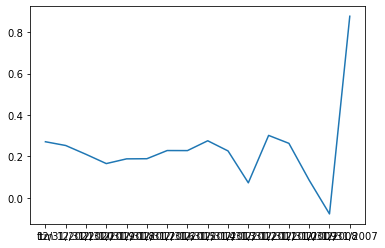

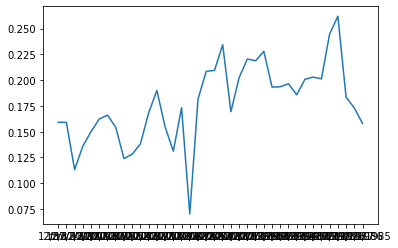

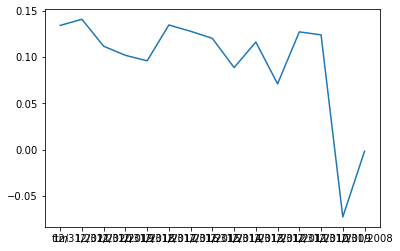

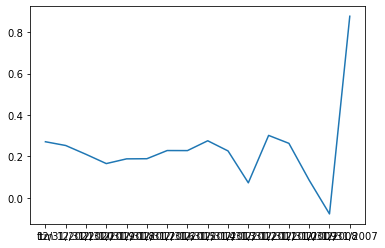

In [ ]:
## Visual Shows
list_groups = [tsla_gross_margin,f_gross_margin,gm_gross_margin,nio_gross_margin]
import matplotlib.pyplot as plt  
for grp in list_groups:
        plt.figure()
        plt.plot(grp)
        plt.show()

In [ ]:
# net income margin:
## Tesla
tsla_netincome = tsla_IS['\tNetIncome'].str.replace(',', '').astype("float")
tsla_income_margin = tsla_netincome/tsla_totalrevenue
## Ford
f_netincome = f_IS['\tNetIncome'].str.replace(',', '').astype("float")
f_income_margin = f_netincome/f_totalrevenue
## General Motors
gm_netincome = gm_IS['\tNetIncome'].str.replace(',', '').astype("float")
gm_income_margin = gm_netincome/gm_totalrevenue
## NIO
nio_netincome = nio_IS['\tNetIncome'].str.replace(',', '').astype("float")
nio_income_margin = nio_netincome/nio_totalrevenue

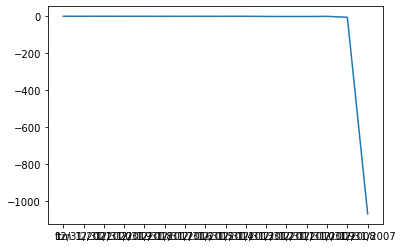

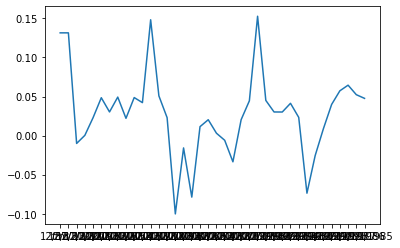

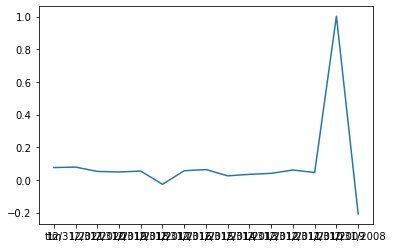

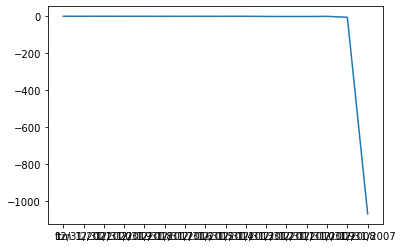

In [ ]:
## Visual Shows
list_groups = [tsla_income_margin,f_income_margin,gm_income_margin,nio_income_margin]
import matplotlib.pyplot as plt  
for grp in list_groups:
        plt.figure()
        plt.plot(grp)
        plt.show()

In [ ]:
# ROA
## Tesla
tsla_totalasset = tsla_BS['TotalAssets'].str.replace(',', '').astype("float")
tsla_roa = tsla_totalrevenue/tsla_totalasset
## Ford
f_totalasset = f_BS['TotalAssets'].str.replace(',', '').astype("float")
f_roa = f_totalrevenue/f_totalasset
## General Motors
gm_totalasset = gm_BS['TotalAssets'].str.replace(',', '').astype("float")
gm_roa = gm_totalrevenue/gm_totalasset
## NIO
nio_totalasset = nio_BS['TotalAssets'].str.replace(',', '').astype("float")
nio_roa = nio_totalrevenue/nio_totalasset

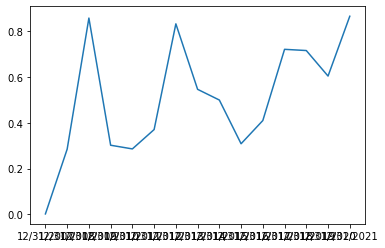

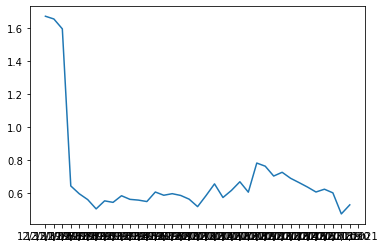

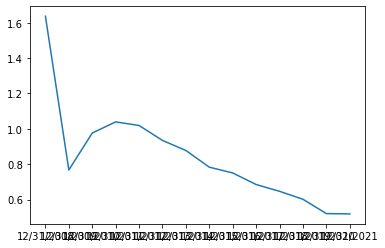

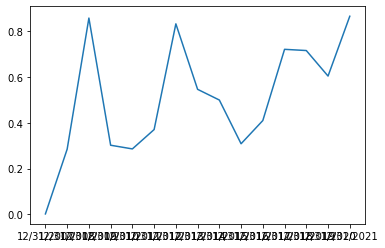

In [ ]:
## Visual Shows
list_groups = [tsla_roa,f_roa,gm_roa,nio_roa]
import matplotlib.pyplot as plt  
for grp in list_groups:
        plt.figure()
        plt.plot(grp)
        plt.show()

In [ ]:
# ROE
## Tesla
tsla_commonequity = tsla_BS['CommonStockEquity'].str.replace(',', '').astype("float")
tsla_shareholderequity = tsla_BS['\tStockholdersEquity'].str.replace(',', '').astype("float")
tsla_roe = tsla_totalrevenue/(tsla_commonequity+tsla_shareholderequity)
## Ford
f_perferequity = f_BS['PreferredStockEquity'].str.replace(',','').astype("float")
f_commonequity = f_BS['CommonStockEquity'].str.replace(',', '').astype("float")
f_shareholderequity = f_BS['\tStockholdersEquity'].str.replace(',', '').astype("float")
f_roe = f_totalrevenue/(f_commonequity+f_shareholderequity+f_perferequity)
## General Motors
gm_perferequity = gm_BS['PreferredStockEquity'].str.replace(',','').astype("float")
gm_commonequity = gm_BS['CommonStockEquity'].str.replace(',', '').astype("float")
gm_shareholderequity = gm_BS['\tStockholdersEquity'].str.replace(',', '').astype("float")
gm_roe = gm_totalrevenue/(gm_commonequity+gm_shareholderequity+gm_perferequity)
## NIO
nio_commonequity = nio_BS['CommonStockEquity'].str.replace(',', '').astype("float")
nio_shareholderequity = nio_BS['\tStockholdersEquity'].str.replace(',', '').astype("float")
nio_roe = nio_totalrevenue/(nio_commonequity+nio_shareholderequity)

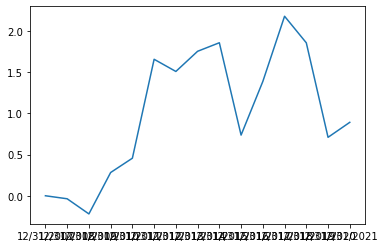

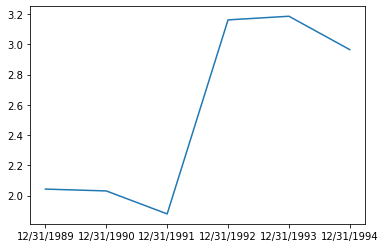

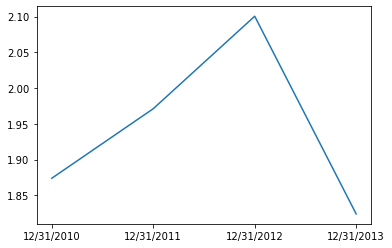

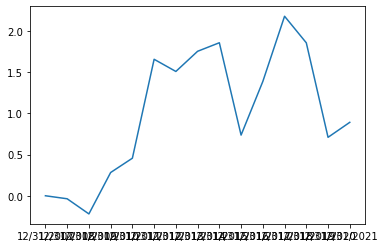

In [ ]:
## Visual Shows
list_groups = [tsla_roe,f_roe,gm_roe,nio_roe]
import matplotlib.pyplot as plt  
for grp in list_groups:
        plt.figure()
        plt.plot(grp)
        plt.show()

#### Part 2 of Ratio Analysis: Financial Health Analysis
- debt to equity, quick ratio, current ratio

In [ ]:
# Debt to Equity
## Tesla
tsla_totalliability = tsla_BS['TotalLiabilitiesNetMinorityInterest'].str.replace(',', '').astype("float")
tsla_totalequity = tsla_BS['TotalEquityGrossMinorityInterest'].str.replace(',', '').astype("float")
tsla_debt_to_equity = tsla_totalliability/tsla_totalequity
## Ford
f_totalliability = f_BS['TotalLiabilitiesNetMinorityInterest'].str.replace(',', '').astype("float")
f_totalequity = f_BS['TotalEquityGrossMinorityInterest'].str.replace(',', '').astype("float")
f_debt_to_equity = f_totalliability/f_totalequity
## General Motors
gm_totalliability = gm_BS['TotalLiabilitiesNetMinorityInterest'].str.replace(',', '').astype("float")
gm_totalequity = gm_BS['TotalEquityGrossMinorityInterest'].str.replace(',', '').astype("float")
gm_debt_to_equity = gm_totalliability/gm_totalequity
## NIO
nio_totalliability = nio_BS['TotalLiabilitiesNetMinorityInterest'].str.replace(',', '').astype("float")
nio_totalequity = nio_BS['TotalEquityGrossMinorityInterest'].str.replace(',', '').astype("float")
nio_debt_to_equity = nio_totalliability/nio_totalequity

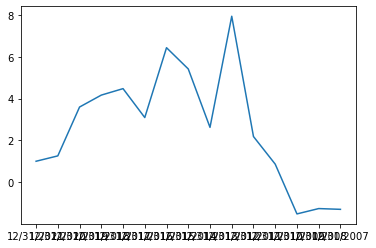

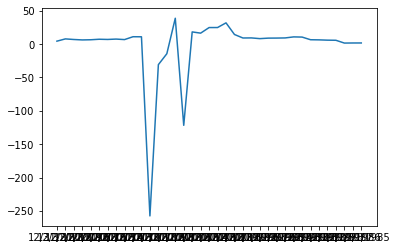

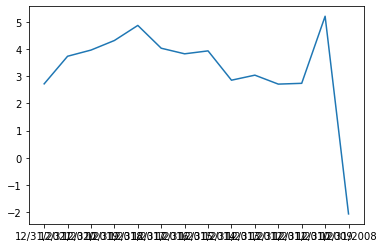

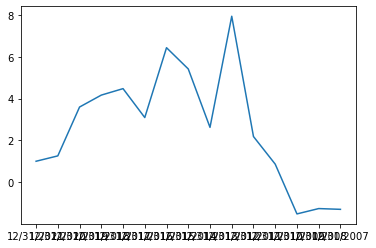

In [ ]:
## Visual Shows
list_groups = [tsla_debt_to_equity,f_debt_to_equity,gm_debt_to_equity,nio_debt_to_equity]
import matplotlib.pyplot as plt  
for grp in list_groups:
        plt.figure()
        plt.plot(grp)
        plt.show()

In [ ]:
# Quick Ratio
## Tesla
tsla_currentasset = tsla_BS['\tCurrentAssets'].str.replace(',', '').astype("float")
tsla_inventory = tsla_BS['\t\tInventory'].str.replace(',', '').astype("float")
tsla_currentliability = tsla_BS['\tCurrentLiabilities'].str.replace(',', '').astype("float")
tsla_quick_ratio = (tsla_currentasset-tsla_inventory)/tsla_currentliability
## Ford
f_currentasset = f_BS['\tCurrentAssets'].str.replace(',', '').astype("float")
f_inventory = f_BS['\t\tInventory'].str.replace(',', '').astype("float")
f_currentliability = f_BS['\tCurrentLiabilities'].str.replace(',', '').astype("float")
f_quick_ratio = (f_currentasset-f_inventory)/f_currentliability
## General Motors
gm_currentasset = gm_BS['\tCurrentAssets'].str.replace(',', '').astype("float")
gm_inventory = gm_BS['\t\tInventory'].str.replace(',', '').astype("float")
gm_currentliability = gm_BS['\tCurrentLiabilities'].str.replace(',', '').astype("float")
gm_quick_ratio = (gm_currentasset-gm_inventory)/gm_currentliability
## NIO
nio_currentasset = nio_BS['\tCurrentAssets'].str.replace(',', '').astype("float")
nio_inventory = nio_BS['\t\tInventory'].str.replace(',', '').astype("float")
nio_currentliability = nio_BS['\tCurrentLiabilities'].str.replace(',', '').astype("float")
nio_quick_ratio = (nio_currentasset-nio_inventory)/nio_currentliability

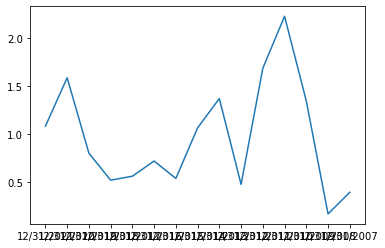

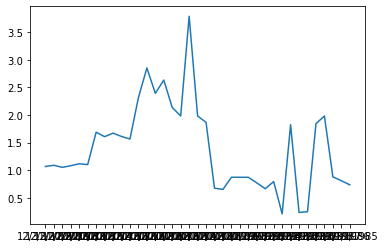

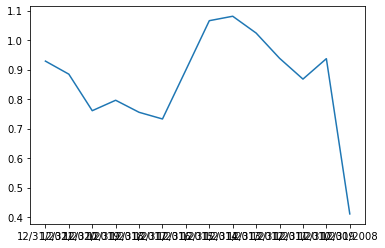

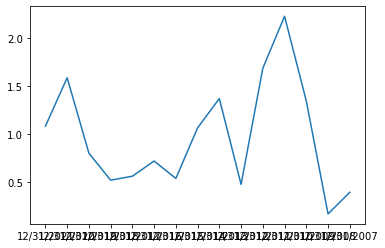

In [ ]:
## Visual Shows
list_groups = [tsla_quick_ratio,f_quick_ratio,gm_quick_ratio,nio_quick_ratio]
import matplotlib.pyplot as plt  
for grp in list_groups:
        plt.figure()
        plt.plot(grp)
        plt.show()

In [ ]:
# Current Ratio
## Tesla
tsla_current_ratio = tsla_currentasset/tsla_currentliability
## Ford
f_current_ratio = f_currentasset/f_currentliability
## General Motors
gm_current_ratio = gm_currentasset/gm_currentliability
## NIO
nio_current_ratio = nio_currentasset/nio_currentliability

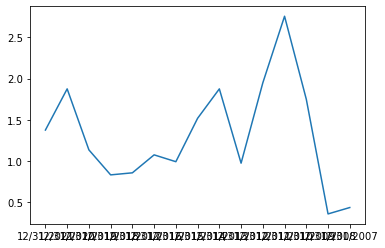

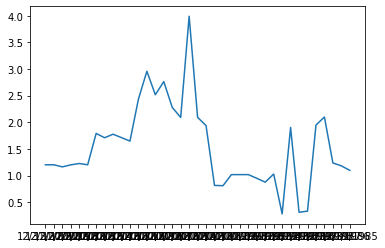

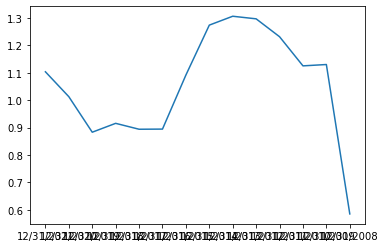

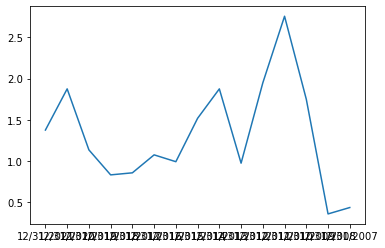

In [ ]:
## Visual Shows
list_groups = [tsla_current_ratio,f_current_ratio,gm_current_ratio,nio_current_ratio]
import matplotlib.pyplot as plt  
for grp in list_groups:
        plt.figure()
        plt.plot(grp)
        plt.show()

#### Part 3 of Ratio Analysis: Valuation Analysis
- p/e
- Cash Flow Analysis

In [ ]:
# Price-earnings ratio (p/e)
## Tesla
## Use the requests library to download the webpage
url = 'https://www.macrotrends.net/stocks/charts/TSLA/tesla/pe-ratio'
## Use the url link to the webpage and get the revenue data
html_data = requests.get(url).text
## Using beautiful soup extract the table and store it into a dataframe
soup = BeautifulSoup(html_data,"html5lib")
## The dataframe should have columns Date and Revenue. Make sure the comma and dollar sign is removed from the Revenue column
tsla_pe = pd.DataFrame(columns=['Date', 'TTM Net EPS','PE Ratio'])
for table in soup.find_all('table'):

    if ('Tesla PE Ratio Historical Data' in table.find('th').text):
        rows = table.find_all('tr')
        
        for row in rows:
            col = row.find_all('td')
            
            if col != []:
                date = col[0].text
                stock_price = col[1].text
                TTM_Net_EPS = col[2].text.replace(',','').replace('$','')
                pe_ratio = col[3].text

                tsla_pe = tsla_pe.append({"Date":date, "Stock Price":stock_price, "TTM Net EPS":TTM_Net_EPS, "PE Ratio":pe_ratio}, ignore_index=True)
# Display the dataframe to check whether there is inappropriate values.
tsla_pe

,Date,TTM Net EPS,PE Ratio,Stock Price
0,2022-04-27,,119.61,881.51
1,2022-03-31,7.37,146.21,1077.60
2,2021-12-31,4.90,215.67,1056.78
3,2021-09-30,3.09,250.96,775.48
4,2021-06-30,1.92,354.01,679.70
5,2021-03-31,1.00,667.93,667.93
6,2020-12-31,0.63,1127.27,705.67
7,2020-09-30,0.50,861.47,429.01
8,2020-06-30,0.38,562.40,215.96
9,2020-03-31,-0.18,0.00,104.80


In [ ]:
# Price-earnings ratio (p/e)
## Ford
## Use the requests library to download the webpage
url = 'https://www.macrotrends.net/stocks/charts/F/ford-motor/pe-ratio'
## Use the url link to the webpage and get the revenue data
html_data = requests.get(url).text
## Using beautiful soup extract the table and store it into a dataframe
soup = BeautifulSoup(html_data,"html5lib")
## The dataframe should have columns Date and Revenue. Make sure the comma and dollar sign is removed from the Revenue column
f_pe = pd.DataFrame(columns=['Date', 'TTM Net EPS','PE Ratio'])
for table in soup.find_all('table'):

    if ('Ford Motor PE Ratio Historical Data' in table.find('th').text):
        rows = table.find_all('tr')
        
        for row in rows:
            col = row.find_all('td')
            
            if col != []:
                date = col[0].text
                stock_price = col[1].text
                TTM_Net_EPS = col[2].text.replace(',','').replace('$','')
                pe_ratio = col[3].text

                f_pe = f_pe.append({"Date":date, "Stock Price":stock_price,"TTM Net EPS":TTM_Net_EPS, "PE Ratio":pe_ratio}, ignore_index=True)
# Display the dataframe to check whether there is inappropriate values.
f_pe

,Date,TTM Net EPS,PE Ratio,Stock Price
0,2022-04-27,,3.35,14.85
1,2021-12-31,4.43,4.63,20.53
2,2021-09-30,0.70,19.89,13.92
3,2021-06-30,0.85,17.19,14.61
4,2021-03-31,0.99,12.17,12.05
5,2020-12-31,-0.32,0.00,8.64
6,2020-09-30,-0.04,0.00,6.55
7,2020-06-30,-0.53,0.00,5.98
8,2020-03-31,-0.77,0.00,4.75
9,2019-12-31,0.02,449.66,8.99


In [ ]:
# Price-earnings ratio (p/e)
## Ford
## Use the requests library to download the webpage
url = 'https://www.macrotrends.net/stocks/charts/GM/general-motors/pe-ratio'
## Use the url link to the webpage and get the revenue data
html_data = requests.get(url).text
## Using beautiful soup extract the table and store it into a dataframe
soup = BeautifulSoup(html_data,"html5lib")
## The dataframe should have columns Date and Revenue. Make sure the comma and dollar sign is removed from the Revenue column
gm_pe = pd.DataFrame(columns=['Date', 'TTM Net EPS','PE Ratio'])
for table in soup.find_all('table'):

    if ('General Motors PE Ratio Historical Data' in table.find('th').text):
        rows = table.find_all('tr')
        
        for row in rows:
            col = row.find_all('td')
            
            if col != []:
                date = col[0].text
                stock_price = col[1].text
                TTM_Net_EPS = col[2].text.replace(',','').replace('$','')
                pe_ratio = col[3].text

                gm_pe = gm_pe.append({"Date":date, "Stock Price":stock_price, "TTM Net EPS":TTM_Net_EPS, "PE Ratio":pe_ratio}, ignore_index=True)
# Display the dataframe to check whether there is inappropriate values.
gm_pe

,Date,TTM Net EPS,PE Ratio,Stock Price
0,2022-04-27,,8.26,38.66
1,2022-03-31,4.68,9.35,43.74
2,2021-12-31,6.71,8.74,58.63
3,2021-09-30,7.48,7.05,52.71
4,2021-06-30,8.64,6.85,59.17
5,2021-03-31,6.18,9.30,57.46
6,2020-12-31,4.32,9.64,41.64
7,2020-09-30,2.23,13.27,29.59
8,2020-06-30,1.05,24.10,25.30
9,2020-03-31,3.27,6.35,20.78


In [ ]:
# Price-earnings ratio (p/e)
## Ford
## Use the requests library to download the webpage
url = 'https://www.macrotrends.net/stocks/charts/NIO/nio/pe-ratio'
## Use the url link to the webpage and get the revenue data
html_data = requests.get(url).text
## Using beautiful soup extract the table and store it into a dataframe
soup = BeautifulSoup(html_data,"html5lib")
## The dataframe should have columns Date and Revenue. Make sure the comma and dollar sign is removed from the Revenue column
nio_pe = pd.DataFrame(columns=['Date', 'TTM Net EPS','PE Ratio'])
for table in soup.find_all('table'):

    if ('NIO PE Ratio Historical Data' in table.find('th').text):
        rows = table.find_all('tr')
        
        for row in rows:
            col = row.find_all('td')
            
            if col != []:
                date = col[0].text
                stock_price = col[1].text
                TTM_Net_EPS = col[2].text.replace(',','').replace('$','')
                pe_ratio = col[3].text

                nio_pe = nio_pe.append({"Date":date, "Stock Price":stock_price, "TTM Net EPS":TTM_Net_EPS, "PE Ratio":pe_ratio}, ignore_index=True)
# Display the dataframe to check whether there is inappropriate values.
nio_pe

,Date,TTM Net EPS,PE Ratio,Stock Price
0,2022-04-28,,0.00,16.93
1,2021-09-30,-0.99,0.00,35.63
2,2021-06-30,-0.85,0.00,53.20
3,2021-03-31,-0.94,0.00,38.98
4,2020-12-31,-0.69,0.00,48.74
5,2020-09-30,-0.93,0.00,21.22
6,2020-06-30,-1.14,0.00,7.72
7,2020-03-31,-1.45,0.00,2.78
8,2019-12-31,-1.60,0.00,4.02
9,2019-09-30,-7.40,0.00,1.56


In [ ]:
# Cash Flow Analysis
## Tesla
tsla_cash_flow = (tsla_CF['OperatingCashFlow'].str.replace(',', '').astype("float"))+(tsla_CF['InvestingCashFlow'].str.replace(',', '').astype("float"))+(tsla_CF['FinancingCashFlow'].str.replace(',', '').astype("float"))
## Ford
f_cash_flow = (f_CF['OperatingCashFlow'].str.replace(',', '').astype("float"))+(f_CF['InvestingCashFlow'].str.replace(',', '').astype("float"))+(f_CF['FinancingCashFlow'].str.replace(',', '').astype("float"))
## General Motors
gm_cash_flow = (gm_CF['OperatingCashFlow'].str.replace(',', '').astype("float"))+(gm_CF['InvestingCashFlow'].str.replace(',', '').astype("float"))+(gm_CF['FinancingCashFlow'].str.replace(',', '').astype("float"))
## NIO
a = nio_CF['OperatingCashFlow'].replace(',', '').astype("float")
b = nio_CF['FinancingCashFlow'].str.replace(',', '').astype("float")
c = nio_CF['InvestingCashFlow'].str.replace(',', '').astype("float")
nio_cash_flow = a+b+c

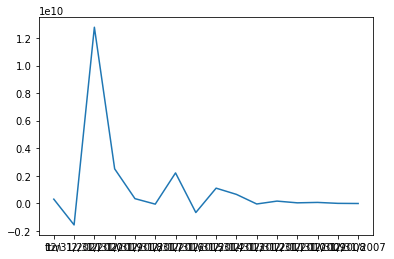

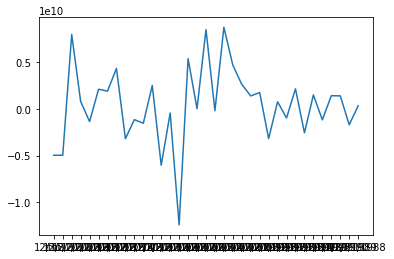

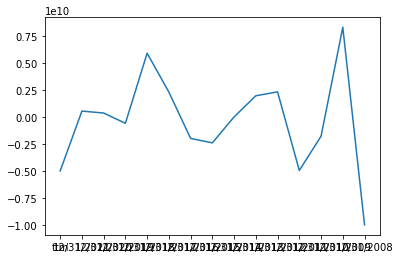

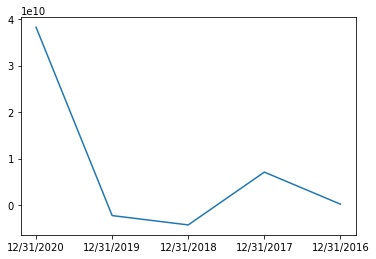

In [ ]:
## Visual Shows
list_groups = [tsla_cash_flow,f_cash_flow,gm_cash_flow,nio_cash_flow]
import matplotlib.pyplot as plt  
for grp in list_groups:
        plt.figure()
        plt.plot(grp)
        plt.show()

In [ ]:
## Overall Valuation Measures:
tsla_v = pd.read_csv('TSLA_quarterly_valuation_measures.csv')
f_v = pd.read_csv('F_quarterly_valuation_measures.csv')
gm_v = pd.read_csv('GM_quarterly_valuation_measures.csv')
nio_v = pd.read_csv('NIO_quarterly_valuation_measures.csv')

## Display in general
from IPython.display import display_html
from itertools import chain,cycle
def display_side_by_side(*args,titles=cycle([''])):
    html_str=''
    for df,title in zip(args, chain(titles,cycle(['</br>'])) ):
        html_str+='<th style="text-align:center"><td style="vertical-align:top">'
        html_str+=f'<h2>{title}</h2>'
        html_str+=df.to_html().replace('table','table style="display:inline"')
        html_str+='</td></th>'
    display_html(html_str,raw=True)

display_side_by_side(tsla_v,f_v,gm_v,nio_v,titles=['Tesla','Ford-Motors','General-Motors',"NIO"])

Tesla 
 
 
 
 name 
 ttm 
 03/31/2022 
 12/31/2021 
 09/30/2021 
 06/30/2021 
 03/31/2021 
 12/31/2020 
 09/30/2020 
 06/30/2020 
 03/31/2020 
 12/31/2019 
 09/30/2019 
 06/30/2019 
 03/31/2019 
 12/31/2018 
 09/30/2018 
 06/30/2018 
 03/31/2018 
 12/31/2017 
 09/30/2017 
 06/30/2017 
 03/31/2017 
 12/31/2016 
 09/30/2016 
 06/30/2016 
 03/31/2016 
 12/31/2015 
 09/30/2015 
 06/30/2015 
 03/31/2015 
 12/31/2014 
 09/30/2014 
 06/30/2014 
 03/31/2014 
 12/31/2013 
 09/30/2013 
 06/30/2013 
 03/31/2013 
 12/31/2012 
 09/30/2012 
 06/30/2012 
 03/31/2012 
 12/31/2011 
 09/30/2011 
 06/30/2011 
 03/31/2011 
 12/31/2010 
 09/30/2010 
 06/30/2010 
 
 
 
 
 0 
 MarketCap 
 1,031,461,265,930 
 1,113,707,801,613 
 1,091,653,740,000 
 778,581,920,000 
 668,824,800,000 
 643,216,590,000 
 677,443,200,000 
 406,701,480,000 
 200,844,660,000 
 96,940,000,000 
 75,717,730,000 
 43,356,600,000 
 39,818,028,801 
 48,337,835,351 
 57,442,278,400 
 45,167,946,736 
 58,230,744,270 
 44,954,663,898 
 52,327,783,433 
 56,925,163,545 
 60,339,329,430 
 45,686,841,200 
 34,423,044,089 
 30,568,794,750 
 31,420,624,200 
 30,756,552,660 
 31,543,314,250 
 32,515,808,400 
 34,096,100,042 
 23,853,411,937 
 27,954,180,672 
 30,423,862,378 
 29,908,646,412 
 25,856,295,588 
 18,516,454,534 
 23,700,606,370 
 12,405,738,194 
 4,339,085,996 
 3,868,437,460 
 3,087,063,512 
 3,292,158,576 
 3,895,454,598 
 2,978,768,987 
 2,541,165,588 
 3,028,966,209 
 2,651,646,810 
 2,527,409,893 
 1,902,835,586 
 2,218,796,835 
 
 
 1 
 EnterpriseValue 
 1,020,473,265,930 
 1,104,873,801,613 
 1,085,684,740,000 
 773,485,920,000 
 664,194,800,000 
 637,111,590,000 
 678,075,200,000 
 413,563,480,000 
 207,964,660,000 
 105,369,000,000 
 84,792,730,000 
 52,502,692,000 
 50,159,972,801 
 58,479,488,351 
 67,929,960,400 
 56,252,469,736 
 68,048,113,270 
 53,702,697,898 
 60,500,402,433 
 63,434,645,545 
 65,989,362,430 
 50,881,740,200 
 34,054,248,089 
 30,606,467,750 
 33,141,075,200 
 32,275,230,660 
 32,796,662,250 
 34,053,026,400 
 35,170,570,042 
 24,456,807,937 
 28,072,801,672 
 30,218,783,378 
 29,526,380,412 
 25,617,284,588 
 18,398,240,534 
 23,548,233,370 
 12,646,859,194 
 4,603,861,996 
 4,133,213,460 
 3,315,482,512 
 3,414,487,576 
 3,895,275,598 
 2,926,429,987 
 2,488,826,588 
 2,844,409,209 
 2,654,171,810 
 2,500,454,893 
 1,863,686,586 
 2,217,846,835 
 
 
 2 
 PeRatio 
 135.417 
 219.918 
 343.11 
 401.803 
 672.97 
 1,043.641 
 1,341.578 
 1,036.256 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 5.897 
 NaN 
 NaN 
 NaN 
 NaN 
 
 
 3 
 ForwardPeRatio 
 87.719 
 107.527 
 121.951 
 104.167 
 161.29 
 163.934 
 175.439 
 114.943 
 370.37 
 91.743 
 95.238 
 43.29 
 NaN 
 51.546 
 61.35 
 74.627 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 384.615 
 128.205 
 833.333 
 90.909 
 156.25 
 106.383 
 72.993 
 48.544 
 65.36 
 64.935 
 70.922 
 60.606 
 133.333 
 200 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 66.667 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 
 
 4 
 PegRatio 
 2.431 
 3.147 
 2.67 
 2.401 
 4.266 
 4.314 
 1.422 
 1.01 
 3.473 
 1.049 
 NaN 
 1.238 
 NaN 
 1.471 
 1.758 
 2.131 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 11.001 
 3.655 
 23.785 
 2.591 
 1.666 
 1.105 
 0.458 
 0.315 
 2.731 
 2.705 
 2.946 
 2.518 
 5.581 
 8.381 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 2.774 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 
 
 5 
 PsRatio 
 18.214 
 22.604 
 25.631 
 21.081 
 21.139 
 22.938 
 25.49 
 15.937 
 7.615 
 3.774 
 2.998 
 1.672 
 1.696 
 2.224 
 3.221 
 3.264 
 4.606 
 3.752 
 4.703 
 5.349 
 6.411 
 5.733 
 4.981 
 5.949 
 6.483 
 7.28 
 8.033 
 8.436 
 9.545 
 7.35 
 9.643 
 12.263 
 14.088 
 12.363 
 10.34 
 16.522 
 12.751 
 9.842 
 8.798 
 19.916 
 17.35 
 18.304 
 13.908 
 11.878 
 15.875 
 18.292 
 11.569 
 19.212 
 19.578 
 
 
 6 
 PbRatio 
 30.261 
 36.891 
 40.352 
 31.389 
 29.058 


#### Part 4 of Ratio Analysis: Other Ratios
- ROI, Return on Tangible Equity

In [ ]:
# ROI (Return on Investment)
## Tesla
## Use the requests library to download the webpage
url = 'https://www.macrotrends.net/stocks/charts/TSLA/tesla/roi'
## Use the url link to the webpage and get the revenue data
html_data = requests.get(url).text
## Using beautiful soup extract the table and store it into a dataframe
soup = BeautifulSoup(html_data,"html5lib")
## The dataframe should have columns Date and Revenue. Make sure the comma and dollar sign is removed from the Revenue column
tsla_roi = pd.DataFrame(columns=['Date', 'TTM Net Income','LT Investments & Debt','Return on Investment'])
for table in soup.find_all('table'):

    if ('Tesla ROI - Return on Investment Historical Data' in table.find('th').text):
        rows = table.find_all('tr')
        
        for row in rows:
            col = row.find_all('td')
            
            if col != []:
                date = col[0].text
                income = col[1].text.replace(',','').replace('$','').replace('B','')
                investment = col[2].text.replace(',','').replace('$','').replace('B','')
                roi = col[3].text

                tsla_roi = tsla_roi.append({"Date":date, "TTM Net Income":income, "LT Investments & Debt":investment, "Return on Investment":roi}, ignore_index=True)
# Display the dataframe to check whether there is inappropriate values.
tsla_roi

,Date,TTM Net Income,LT Investments & Debt,Return on Investment
0,2022-03-31,22.26,38.10,62.61%
1,2021-12-31,19.25,36.26,56.19%
2,2021-09-30,12.94,34.33,38.80%
3,2021-06-30,11.75,33.52,37.12%
4,2021-03-31,10.76,32.92,37.68%
5,2020-12-31,10.45,32.68,40.94%
6,2020-09-30,0.54,27.50,2.43%
7,2020-06-30,-0.01,21.18,-0.06%
8,2020-03-31,-0.51,20.77,-2.66%
9,2019-12-31,-1.31,19.10,-7.45%


- It's important to notice that the unit for column 2 and 3 is 'billion'.

In [ ]:
# ROI (Return on Investment)
## Ford
## Use the requests library to download the webpage
url = 'https://www.macrotrends.net/stocks/charts/F/ford-motor/roi'
## Use the url link to the webpage and get the revenue data
html_data = requests.get(url).text
## Using beautiful soup extract the table and store it into a dataframe
soup = BeautifulSoup(html_data,"html5lib")
## The dataframe should have columns Date and Revenue. Make sure the comma and dollar sign is removed from the Revenue column
f_roi = pd.DataFrame(columns=['Date', 'TTM Net Income','LT Investments & Debt','Return on Investment'])
for table in soup.find_all('table'):

    if ('Ford Motor ROI - Return on Investment Historical Data' in table.find('th').text):
        rows = table.find_all('tr')
        
        for row in rows:
            col = row.find_all('td')
            
            if col != []:
                date = col[0].text
                income = col[1].text.replace(',','').replace('$','').replace('B','')
                investment = col[2].text.replace(',','').replace('$','').replace('B','')
                roi = col[3].text

                f_roi = f_roi.append({"Date":date, "TTM Net Income":income, "LT Investments & Debt":investment, "Return on Investment":roi}, ignore_index=True)
# Display the dataframe to check whether there is inappropriate values.
f_roi

,Date,TTM Net Income,LT Investments & Debt,Return on Investment
0,2021-12-31,4.52,137.02,3.33%
1,2021-09-30,1.34,133.95,0.98%
2,2021-06-30,2.35,135.69,1.70%
3,2021-03-31,-0.39,137.18,-0.27%
4,2020-12-31,-4.41,141.15,-3.06%
5,2020-09-30,-2.42,139.44,-1.70%
6,2020-06-30,-5.04,150.74,-3.57%
7,2020-03-31,-2.19,144.11,-1.58%
8,2019-12-31,0.57,134.59,0.42%
9,2019-09-30,1.66,134.89,1.21%


- It's important to notice that the unit for column 2 and 3 is 'billion'.

In [ ]:
# ROI (Return on Investment)
## General Motors
## Use the requests library to download the webpage
url = 'https://www.macrotrends.net/stocks/charts/GM/general-motors/roi'
## Use the url link to the webpage and get the revenue data
html_data = requests.get(url).text
## Using beautiful soup extract the table and store it into a dataframe
soup = BeautifulSoup(html_data,"html5lib")
## The dataframe should have columns Date and Revenue. Make sure the comma and dollar sign is removed from the Revenue column
gm_roi = pd.DataFrame(columns=['Date', 'TTM Net Income','LT Investments & Debt','Return on Investment'])
for table in soup.find_all('table'):

    if ('General Motors ROI - Return on Investment Historical Data' in table.find('th').text):
        rows = table.find_all('tr')
        
        for row in rows:
            col = row.find_all('td')
            
            if col != []:
                date = col[0].text
                income = col[1].text.replace(',','').replace('$','').replace('B','')
                investment = col[2].text.replace(',','').replace('$','').replace('B','')
                roi = col[3].text

                gm_roi = gm_roi.append({"Date":date, "TTM Net Income":income, "LT Investments & Debt":investment, "Return on Investment":roi}, ignore_index=True)
# Display the dataframe to check whether there is inappropriate values.
gm_roi

,Date,TTM Net Income,LT Investments & Debt,Return on Investment
0,2022-03-31,8.24,143.83,5.95%
1,2021-12-31,9.32,141.47,6.89%
2,2021-09-30,10.57,134.46,8.10%
3,2021-06-30,13.35,134.57,10.32%
4,2021-03-31,9.25,130.62,7.21%
5,2020-12-31,6.63,122.66,5.21%
6,2020-09-30,3.31,129.80,2.66%
7,2020-06-30,1.19,130.64,0.98%
8,2020-03-31,4.89,125.76,4.11%
9,2019-12-31,5.48,111.88,4.67%


- It's important to notice that the unit for column 2 and 3 is 'billion'.

In [ ]:
# ROI
## NIO
## Use the requests library to download the webpage
url = 'https://www.macrotrends.net/stocks/charts/NIO/nio/roi'
## Use the url link to the webpage and get the revenue data
html_data = requests.get(url).text
## Using beautiful soup extract the table and store it into a dataframe
soup = BeautifulSoup(html_data,"html5lib")
## The dataframe should have columns Date and Revenue. Make sure the comma and dollar sign is removed from the Revenue column
nio_roi = pd.DataFrame(columns=['Date', 'TTM Net Income','LT Investments & Debt','Return on Investment'])
for table in soup.find_all('table'):

    if ('NIO ROI - Return on Investment Historical Data' in table.find('th').text):
        rows = table.find_all('tr')
        
        for row in rows:
            col = row.find_all('td')
            
            if col != []:
                date = col[0].text
                income = col[1].text.replace(',','').replace('$','').replace('B','')
                investment = col[2].text.replace(',','').replace('$','').replace('B','')
                roi = col[3].text

                nio_roi = nio_roi.append({"Date":date, "TTM Net Income":income, "LT Investments & Debt":investment, "Return on Investment":roi}, ignore_index=True)
# Display the dataframe to check whether there is inappropriate values.
nio_roi

,Date,TTM Net Income,LT Investments & Debt,Return on Investment
0,2021-09-30,-0.50,5.33,-9.19%
1,2021-06-30,-0.48,5.60,-10.42%
2,2021-03-31,-0.53,5.68,-16.14%
3,2020-12-31,-0.71,5.07,-38.62%
4,2020-09-30,-0.92,2.18,-155.50%
5,2020-06-30,-1.12,0.18,-660.95%
6,2020-03-31,-1.42,-0.12,-434.50%
7,2019-12-31,-1.59,0.13,-230.16%
8,2019-09-30,-1.61,0.49,-155.54%


- It's important to notice that the unit for column 2 and 3 is 'billion'.

In [ ]:
# Return on Tangible Equity
## Tesla
## Use the requests library to download the webpage
url = 'https://www.macrotrends.net/stocks/charts/TSLA/tesla/return-on-tangible-equity'
## Use the url link to the webpage and get the revenue data
html_data = requests.get(url).text
## Using beautiful soup extract the table and store it into a dataframe
soup = BeautifulSoup(html_data,"html5lib")
## The dataframe should have columns Date and Revenue. Make sure the comma and dollar sign is removed from the Revenue column
tsla_re = pd.DataFrame(columns=['Date', 'TTM Net Income','Tangible Equity','Return on Tangible Equity'])
for table in soup.find_all('table'):

    if ('Tesla Return On Tangible Equity Historical Data' in table.find('th').text):
        rows = table.find_all('tr')
        
        for row in rows:
            col = row.find_all('td')
            
            if col != []:
                date = col[0].text
                income = col[1].text.replace(',','').replace('$','').replace('B','')
                equity = col[2].text.replace(',','').replace('$','').replace('B','')
                re = col[3].text

                tsla_re = tsla_re.append({"Date":date, "TTM Net Income":income, "Tangible Equity":equity, "Return on Tangible Equity":re}, ignore_index=True)

## Ford
## Use the requests library to download the webpage
url = 'https://www.macrotrends.net/stocks/charts/F/ford-motor/return-on-tangible-equity'
## Use the url link to the webpage and get the revenue data
html_data = requests.get(url).text
## Using beautiful soup extract the table and store it into a dataframe
soup = BeautifulSoup(html_data,"html5lib")
## The dataframe should have columns Date and Revenue. Make sure the comma and dollar sign is removed from the Revenue column
f_re = pd.DataFrame(columns=['Date', 'TTM Net Income','Tangible Equity','Return on Tangible Equity'])
for table in soup.find_all('table'):

    if ('Ford Motor Return On Tangible Equity Historical Data' in table.find('th').text):
        rows = table.find_all('tr')
        
        for row in rows:
            col = row.find_all('td')
            
            if col != []:
                date = col[0].text
                income = col[1].text.replace(',','').replace('$','').replace('B','')
                equity = col[2].text.replace(',','').replace('$','').replace('B','')
                re = col[3].text

                f_re = f_re.append({"Date":date, "TTM Net Income":income, "Tangible Equity":equity, "Return on Tangible Equity":re}, ignore_index=True)

## General Motors
## Use the requests library to download the webpage
url = 'https://www.macrotrends.net/stocks/charts/GM/general-motors/return-on-tangible-equity'
## Use the url link to the webpage and get the revenue data
html_data = requests.get(url).text
## Using beautiful soup extract the table and store it into a dataframe
soup = BeautifulSoup(html_data,"html5lib")
## The dataframe should have columns Date and Revenue. Make sure the comma and dollar sign is removed from the Revenue column
gm_re = pd.DataFrame(columns=['Date', 'TTM Net Income','Tangible Equity','Return on Tangible Equity'])
for table in soup.find_all('table'):

    if ('General Motors Return On Tangible Equity Historical Data' in table.find('th').text):
        rows = table.find_all('tr')
        
        for row in rows:
            col = row.find_all('td')
            
            if col != []:
                date = col[0].text
                income = col[1].text.replace(',','').replace('$','').replace('B','')
                equity = col[2].text.replace(',','').replace('$','').replace('B','')
                re = col[3].text

                gm_re = gm_re.append({"Date":date, "TTM Net Income":income, "Tangible Equity":equity, "Return on Tangible Equity":re}, ignore_index=True)

## NIO
## Use the requests library to download the webpage
url = 'https://www.macrotrends.net/stocks/charts/NIO/nio/return-on-tangible-equity'
## Use the url link to the webpage and get the revenue data
html_data = requests.get(url).text
## Using beautiful soup extract the table and store it into a dataframe
soup = BeautifulSoup(html_data,"html5lib")
## The dataframe should have columns Date and Revenue. Make sure the comma and dollar sign is removed from the Revenue column
nio_re = pd.DataFrame(columns=['Date', 'TTM Net Income','Tangible Equity','Return on Tangible Equity'])
for table in soup.find_all('table'):

    if ('NIO Return On Tangible Equity Historical Data' in table.find('th').text):
        rows = table.find_all('tr')
        
        for row in rows:
            col = row.find_all('td')
            
            if col != []:
                date = col[0].text
                income = col[1].text.replace(',','').replace('$','').replace('B','')
                equity = col[2].text.replace(',','').replace('$','').replace('B','')
                re = col[3].text

                nio_re = nio_re.append({"Date":date, "TTM Net Income":income, "Tangible Equity":equity, "Return on Tangible Equity":re}, ignore_index=True)

In [ ]:
## Display the dataframe in general
from IPython.display import display_html
from itertools import chain,cycle
def display_side_by_side(*args,titles=cycle([''])):
    html_str=''
    for df,title in zip(args, chain(titles,cycle(['</br>'])) ):
        html_str+='<th style="text-align:center"><td style="vertical-align:top">'
        html_str+=f'<h2>{title}</h2>'
        html_str+=df.to_html().replace('table','table style="display:inline"')
        html_str+='</td></th>'
    display_html(html_str,raw=True)

display_side_by_side(tsla_re,f_re,gm_re,nio_re,titles=['Tesla','Ford-Motors','General-Motors',"NIO"])

,Date,TTM Net Income,Tangible Equity,Return on Tangible Equity
0,2022-03-31,21.42,34.49,72.83%
1,2021-12-31,18.54,30.56,69.63%
2,2021-09-30,12.23,27.42,49.68%
3,2021-06-30,10.91,25.16,49.92%
4,2021-03-31,9.88,23.36,54.49%
5,2020-12-31,9.45,22.56,64.46%
6,2020-09-30,6.56,16.37,60.99%
7,2020-06-30,6.41,10.22,77.61%
8,2020-03-31,5.89,9.52,81.61%
9,2019-12-31,5.17,6.93,84.43%


- It's important to notice that the units for column income and tangible equity are all in 'billion' dollars. 

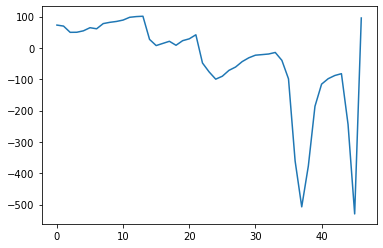

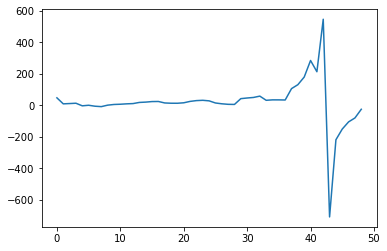

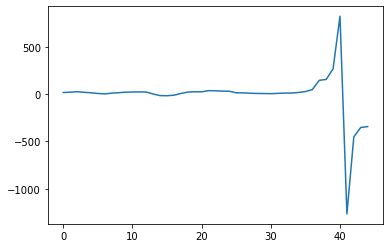

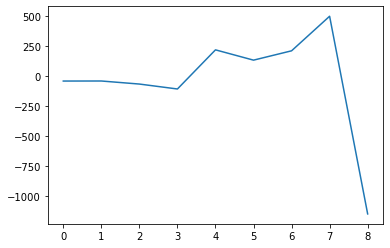

In [ ]:
## Visual Shows
t_r = tsla_re['Return on Tangible Equity'].str.replace("%",'').astype("float")
f_r = f_re['Return on Tangible Equity'].str.replace("%",'').astype("float")
g_r = gm_re['Return on Tangible Equity'].str.replace("%",'').astype("float")
n_r = nio_re['Return on Tangible Equity'].str.replace("%",'').astype("float")
list_groups = [t_r,f_r,g_r,n_r]
import matplotlib.pyplot as plt  
for grp in list_groups:
        plt.figure()
        plt.plot(grp)
        plt.show()

### Part 3: Other Metrics:
#### Part 1 of Other Metrics: Dividend Yield History
##### Tesla:
- 51 Year Dividend History
- Historical dividend payout and yield for Tesla (TSLA) since 1971. The current TTM dividend payout for Tesla (TSLA) as of April 28, 2022 is $0.00. The current dividend yield for Tesla as of April 28, 2022 is 0.00%.

##### Ford Motros
- 32 Year Dividend History
- Historical dividend payout and yield for Ford Motor (F) since 1990. The current TTM dividend payout for Ford Motor (F) as of April 28, 2022 is $0.40. The current dividend yield for Ford Motor as of April 28, 2022 is 2.72%.

##### General Motors
- 6 Year Dividend History
- Historical dividend payout and yield for General Motors (GM) since 2016. The current TTM dividend payout for General Motors (GM) as of April 28, 2022 is $0.00. The current dividend yield for General Motors as of April 28, 2022 is 0.00%.

##### NIO
- No Dividend Yield as recorded.

#### Part 2 of Other Metrics: Number of Employees

##### Tesla:
- Interactive chart of Tesla (TSLA) annual worldwide employee count from 2010 to 2022.
    - Tesla total number of employees in 2021 was 99,290, a 40.33% increase from 2020.
    - Tesla total number of employees in 2020 was 70,757, a 47.36% increase from 2019.
    - Tesla total number of employees in 2019 was 48,016, a 1.64% decline from 2018.
    - Tesla total number of employees in 2018 was 48,817, a 30.03% increase from 2017.

In [ ]:
## Use the requests library to download the webpage
url = 'https://www.macrotrends.net/stocks/charts/TSLA/tesla/number-of-employees'
## Use the url link to the webpage and get the revenue data
html_data = requests.get(url).text
## Using beautiful soup extract the table and store it into a dataframe
soup = BeautifulSoup(html_data,"html5lib")
## The dataframe should have columns Date and Revenue. Make sure the comma and dollar sign is removed from the Revenue column
tsla_ep = pd.DataFrame(columns=['Date', 'Annual Number of Employees'])
for table in soup.find_all('table'):

    if ('Tesla Annual Number of Employees' in table.find('th').text):
        rows = table.find_all('tr')
        
        for row in rows:
            col = row.find_all('td')
            
            if col != []:
                date = col[0].text
                employee = col[1].text.replace(',','')

                tsla_ep = tsla_ep.append({"Date":date, "Annual Number of Employees":employee}, ignore_index=True)

##### Ford Motors:
- Interactive chart of Ford Motor (F) annual worldwide employee count from 2010 to 2021.
    - Ford Motor total number of employees in 2021 was 183,000, a 1.61% decline from 2020.
    - Ford Motor total number of employees in 2020 was 186,000, a 2.11% decline from 2019.
    - Ford Motor total number of employees in 2019 was 190,000, a 4.52% decline from 2018.
    - Ford Motor total number of employees in 2018 was 199,000, a 1.49% decline from 2017.

In [ ]:
## Use the requests library to download the webpage
url = 'https://www.macrotrends.net/stocks/charts/F/ford-motor/number-of-employees'
## Use the url link to the webpage and get the revenue data
html_data = requests.get(url).text
## Using beautiful soup extract the table and store it into a dataframe
soup = BeautifulSoup(html_data,"html5lib")
## The dataframe should have columns Date and Revenue. Make sure the comma and dollar sign is removed from the Revenue column
f_ep = pd.DataFrame(columns=['Date', 'Annual Number of Employees'])
for table in soup.find_all('table'):

    if ('Ford Motor Annual Number of Employees' in table.find('th').text):
        rows = table.find_all('tr')
        
        for row in rows:
            col = row.find_all('td')
            
            if col != []:
                date = col[0].text
                employee = col[1].text.replace(',','')

                f_ep = f_ep.append({"Date":date, "Annual Number of Employees":employee}, ignore_index=True)

##### General Motors:
- Interactive chart of General Motors (GM) annual worldwide employee count from 2010 to 2022.
    - General Motors total number of employees in 2021 was 157,000, a 1.29% increase from 2020.
    - General Motors total number of employees in 2020 was 155,000, a 5.49% decline from 2019.
    - General Motors total number of employees in 2019 was 164,000, a 5.2% decline from 2018.
    - General Motors total number of employees in 2018 was 173,000, a 3.89% decline from 2017.

In [ ]:
## Use the requests library to download the webpage
url = 'https://www.macrotrends.net/stocks/charts/GM/general-motor/number-of-employees'
## Use the url link to the webpage and get the revenue data
html_data = requests.get(url).text
## Using beautiful soup extract the table and store it into a dataframe
soup = BeautifulSoup(html_data,"html5lib")
## The dataframe should have columns Date and Revenue. Make sure the comma and dollar sign is removed from the Revenue column
gm_ep = pd.DataFrame(columns=['Date', 'Annual Number of Employees'])
for table in soup.find_all('table'):

    if ('General Motors Annual Number of Employees' in table.find('th').text):
        rows = table.find_all('tr')
        
        for row in rows:
            col = row.find_all('td')
            
            if col != []:
                date = col[0].text
                employee = col[1].text.replace(',','')

                gm_ep = gm_ep.append({"Date":date, "Annual Number of Employees":employee}, ignore_index=True)

##### NIO:
- Interactive chart of NIO (NIO) annual worldwide employee count from 2019 to 2021.
    - NIO total number of employees in 2020 was 7,763, a 4.31% increase from 2019.
    - NIO total number of employees in 2019 was 7,442, a 24.32% decline from 2018.
    - NIO total number of employees in 2018 was 9,834, a 378.31% increase from 2017.
    - NIO total number of employees in 2017 was 2,056, a INF% increase from .

In [ ]:
## Use the requests library to download the webpage
url = 'https://www.macrotrends.net/stocks/charts/NIO/nio/number-of-employees'
## Use the url link to the webpage and get the revenue data
html_data = requests.get(url).text
## Using beautiful soup extract the table and store it into a dataframe
soup = BeautifulSoup(html_data,"html5lib")
## The dataframe should have columns Date and Revenue. Make sure the comma and dollar sign is removed from the Revenue column
nio_ep = pd.DataFrame(columns=['Date', 'Annual Number of Employees'])
for table in soup.find_all('table'):

    if ('NIO Annual Number of Employees' in table.find('th').text):
        rows = table.find_all('tr')
        
        for row in rows:
            col = row.find_all('td')
            
            if col != []:
                date = col[0].text
                employee = col[1].text.replace(',','')

                nio_ep = nio_ep.append({"Date":date, "Annual Number of Employees":employee}, ignore_index=True)

In [ ]:
## Display the dataframe in general which is better to compare 
from IPython.display import display_html
from itertools import chain,cycle
def display_side_by_side(*args,titles=cycle([''])):
    html_str=''
    for df,title in zip(args, chain(titles,cycle(['</br>'])) ):
        html_str+='<th style="text-align:center"><td style="vertical-align:top">'
        html_str+=f'<h2>{title}</h2>'
        html_str+=df.to_html().replace('table','table style="display:inline"')
        html_str+='</td></th>'
    display_html(html_str,raw=True)

display_side_by_side(tsla_ep,f_ep,gm_ep,nio_ep,titles=['Tesla','Ford-Motors','General-Motors',"NIO"])

,Date,Annual Number of Employees
0,2021,99290
1,2020,70757
2,2019,48016
3,2018,48817
4,2017,37543
5,2016,17782
6,2015,13058
7,2014,10161
8,2013,5859
9,2012,2964


- TSLA’s innovation outlook is trending down based on a current score of 73 out of 99, outperforming sector average. Jobs growth over the past year has decreased and insiders sentiment is negative. TSLA is an medium in terms of sustainability. Over the past 4 quarters TSLA beat earnings estimates 4 times.
- F’s innovation outlook is neutral based on a current score of 96 out of 99, outperforming sector average. Jobs growth over the past year has increased and insiders sentiment is positive. F is an medium in terms of sustainability. Over the past 4 quarters F beat earnings estimates 3 times and it pays dividend higher than its peers.
- GM’s innovation outlook is trending down based on a current score of 91 out of 99, outperforming sector average. Jobs growth over the past year has decreased and insiders sentiment is negative. GM is an high in terms of sustainability. Over the past 4 quarters GM beat earnings estimates 3 times.
- Over the past 4 quarters NIO beat earnings estimates 2 times. But Nio records so less data. 

#### Quick Summary:
#### Part 1: Earnings & Growth Analysis:
- Revenue Growth
- Stock Price changes

#### Part 2: Ratio Analysis:
- Profitability Analysis:
    - EBIDTA, ROA, ROE, Gross Profit Margin, Net Income Margin
- Financial Health Analysis:
    - Debt to Equity Ratio, Quick Ratio, Current Ratio
- Valuation Analysis:
    - P/E ratio, Cash FLow Analysis
- Other Ratios:
    - ROI, Return on Tangible Equity

#### Part 3: Other Metrics:
- Dividend Yield History
- Number of Employees

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=d01e108c-9b50-41d7-b5f3-e09e7e71a1a6' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>